<a href="https://colab.research.google.com/github/gksals8378/Lending_club/blob/main/0918_Lending_club(preprocessed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/0preporcessing/lending_club.csv")
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'emp_category'],
      dtype='object')

In [ ]:
df[df['dti']>1500]

# df = df.drop([350865], axis=0)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category
285465,3700.0,36 months,12.59,123.94,C2,0,MORTGAGE,0.0,Not Verified,Charged Off,...,9999.0,8.0,0.0,10649.0,56.9,20.0,f,JOINT,1.0,no job
350607,24000.0,36 months,9.16,764.99,B2,0,MORTGAGE,600.0,Source Verified,Fully Paid,...,1622.0,16.0,0.0,24733.0,58.5,21.0,f,JOINT,2.0,no job


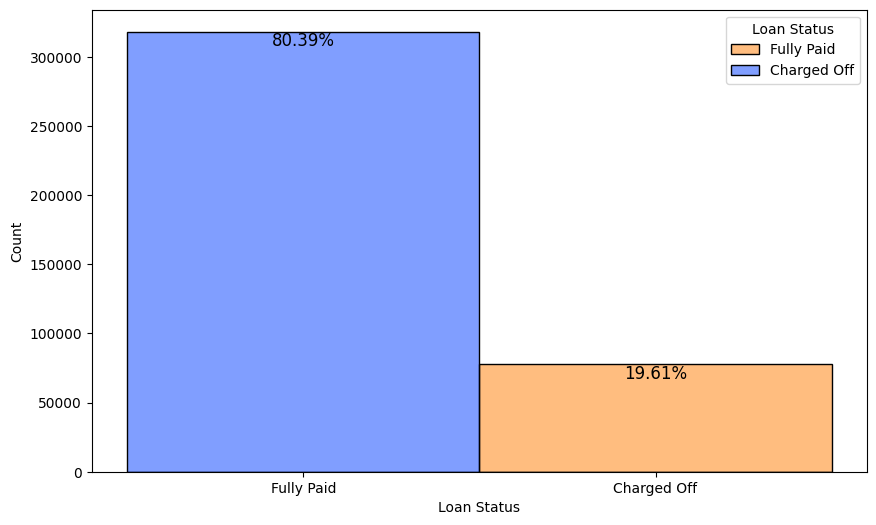

In [ ]:
status_counts = df['loan_status'].value_counts()

total_loans = len(df)
status_ratios = status_counts / total_loans

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="loan_status", hue="loan_status")

plt.xlabel("Loan Status")
plt.ylabel("Count")

plt.legend(title="Loan Status", labels=["Fully Paid", "Charged Off"])

for i, status in enumerate(status_counts.index):
    ratio = status_ratios[i]
    plt.text(i, status_counts[i], f"{ratio:.2%}", ha='center', va='top', fontsize=12)

plt.show()

<Figure size 1600x1600 with 0 Axes>

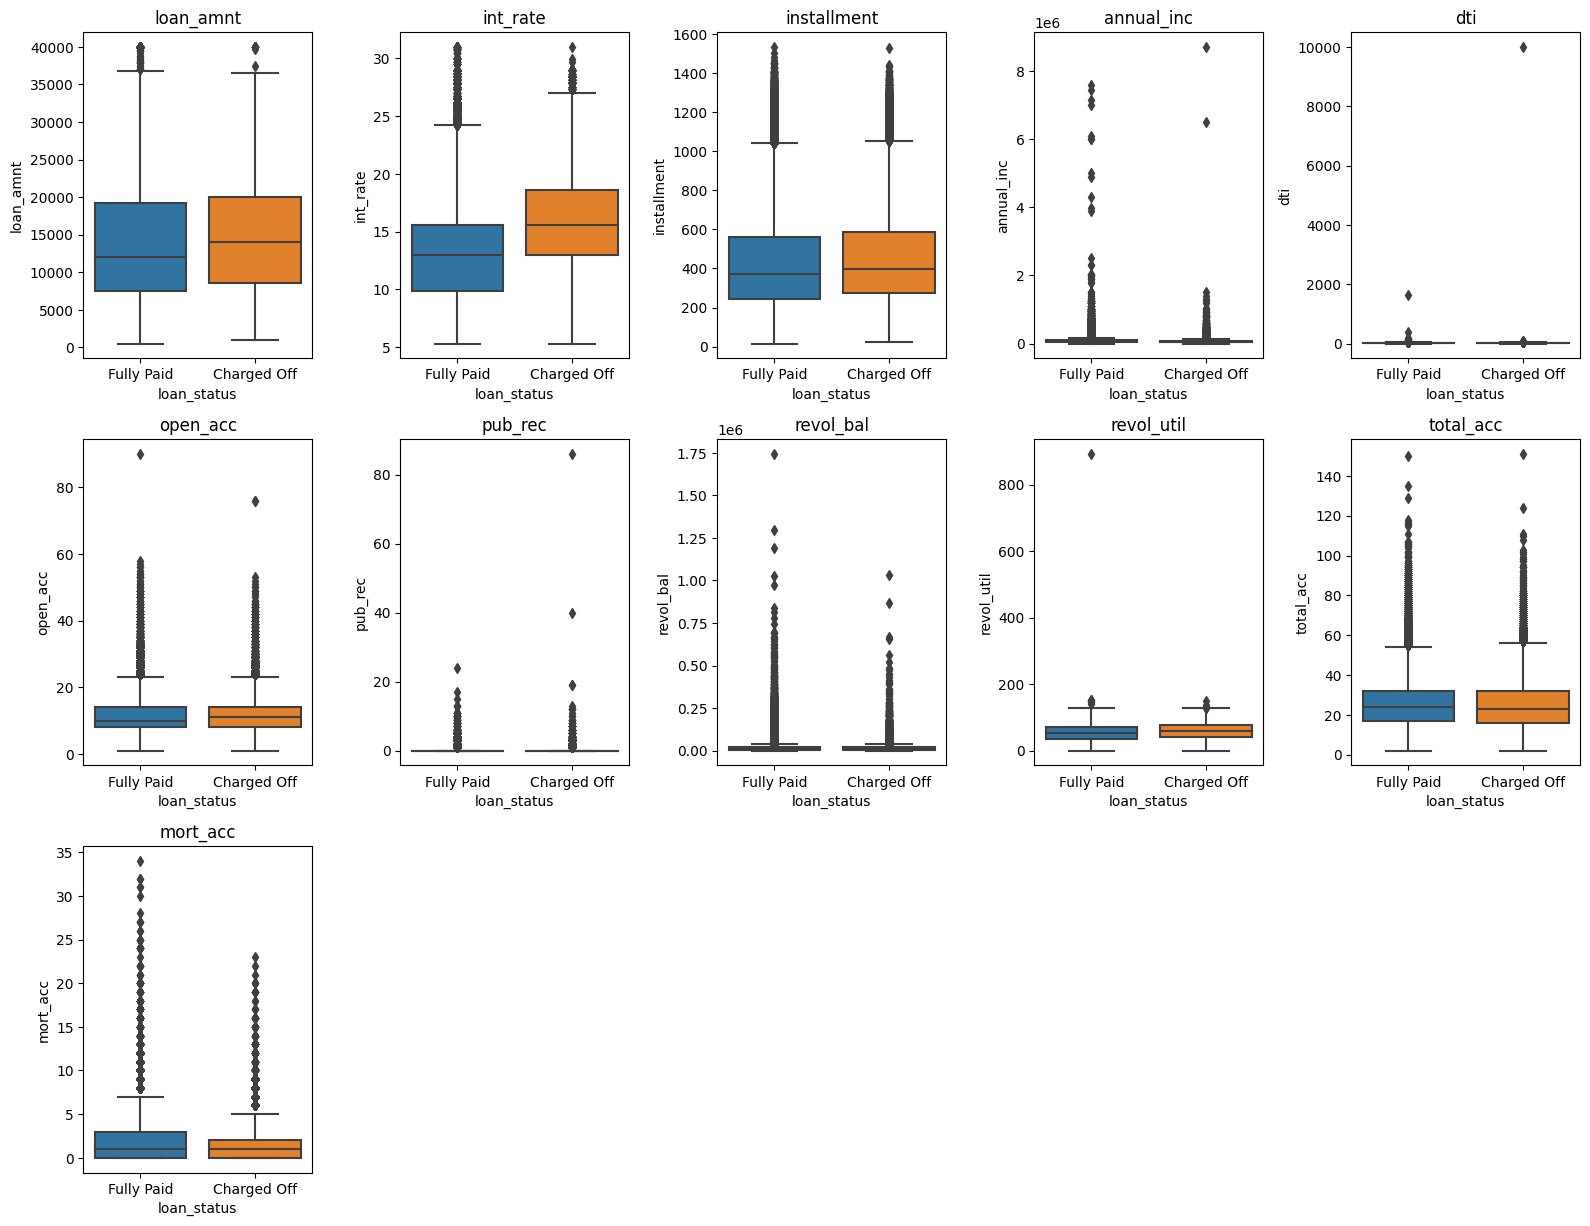

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_rows % 4
position = range(1, num_cols+1)


fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 5, k)

  sns.boxplot(data=df, ax=ax, x='loan_status', y=col)
  ax.set_title(col)

plt.tight_layout()
plt.show()

# 이상치 제거 후

In [ ]:
#q1, q3,irq 계산
def_df = df
for col in numerical_columns:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1

  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  def_df = def_df[(def_df[col] >= lower_bound) & (def_df[col] <= upper_bound)]


In [ ]:
def_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category
0,10000.0,36 months,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,...,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,marketing
1,8000.0,36 months,11.99,265.68,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,credit analyst
2,15600.0,36 months,10.49,506.97,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,...,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,statistician
3,7200.0,36 months,6.49,220.65,A2,6 years,RENT,54000.0,Not Verified,Fully Paid,...,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,small business owner
4,24375.0,60 months,17.27,609.33,C5,9 years,MORTGAGE,55000.0,Verified,Charged Off,...,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395748,6000.0,36 months,13.11,202.49,B4,5 years,RENT,64000.0,Not Verified,Fully Paid,...,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,small business owner
395749,10000.0,60 months,10.99,217.38,B4,2 years,RENT,40000.0,Source Verified,Fully Paid,...,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,small business owner
395751,5000.0,36 months,9.99,161.32,B1,10+ years,RENT,56500.0,Verified,Fully Paid,...,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,city carrier
395752,21000.0,60 months,15.31,503.02,C2,10+ years,MORTGAGE,64000.0,Verified,Fully Paid,...,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,corporation


<Figure size 1600x1600 with 0 Axes>

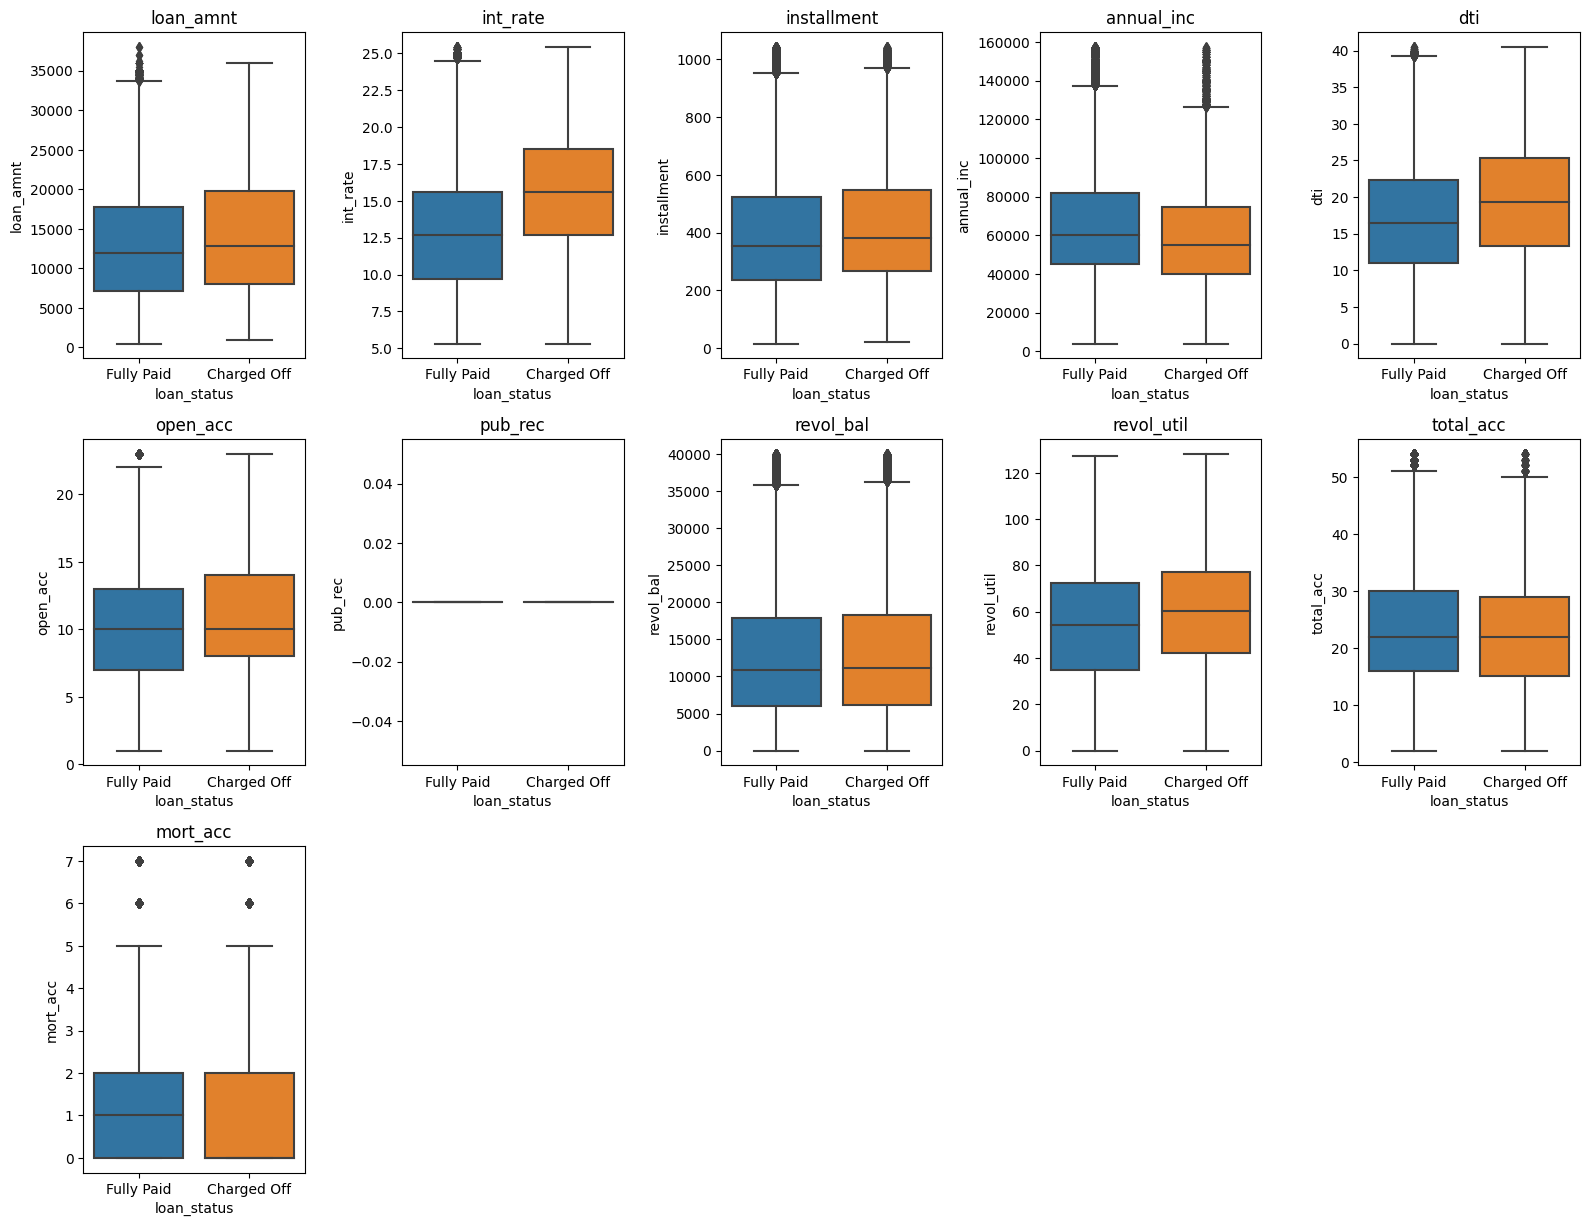

In [ ]:
fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 5, k)

  sns.boxplot(data=def_df, ax=ax, x='loan_status', y=col)
  ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='loan_status', ylabel='Count'>

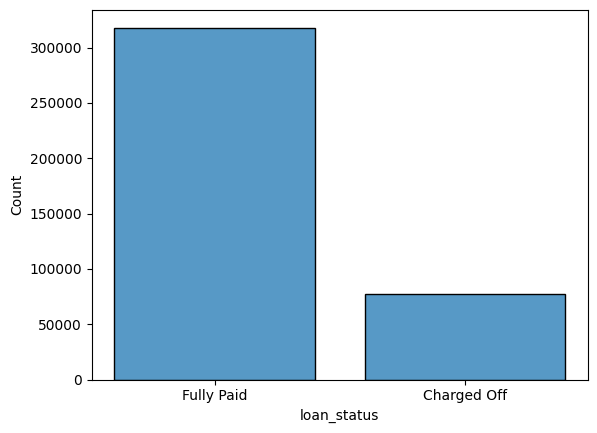

In [ ]:
sns.histplot(data=df, x="loan_status", shrink=0.8)

<Axes: xlabel='loan_status', ylabel='Count'>

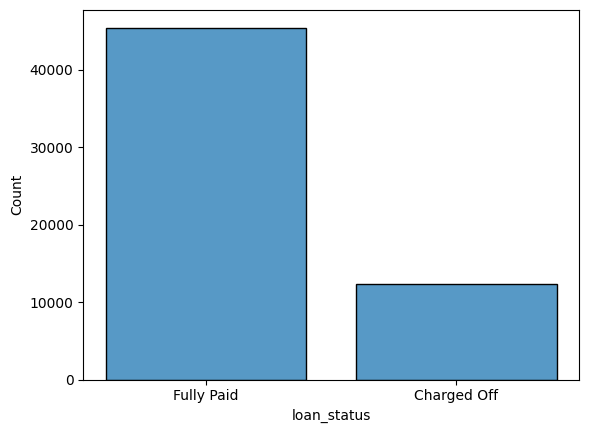

In [ ]:
df[df['pub_rec'] != 0]['pub_rec'].value_counts()

pub_rec_1 = df[df['pub_rec'] != 0]

sns.histplot(data=pub_rec_1, x="loan_status", shrink=0.8)

# loan_status // purpose

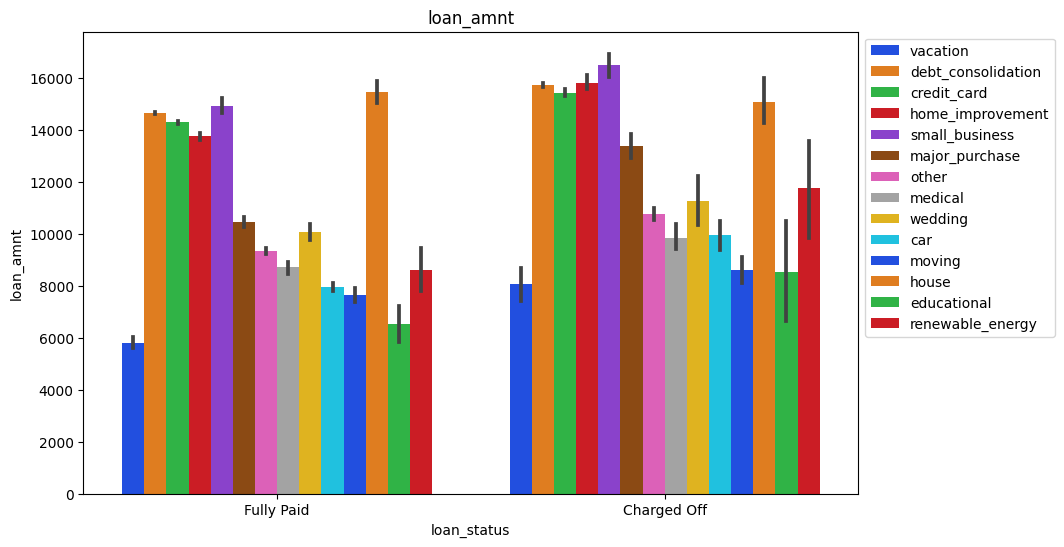

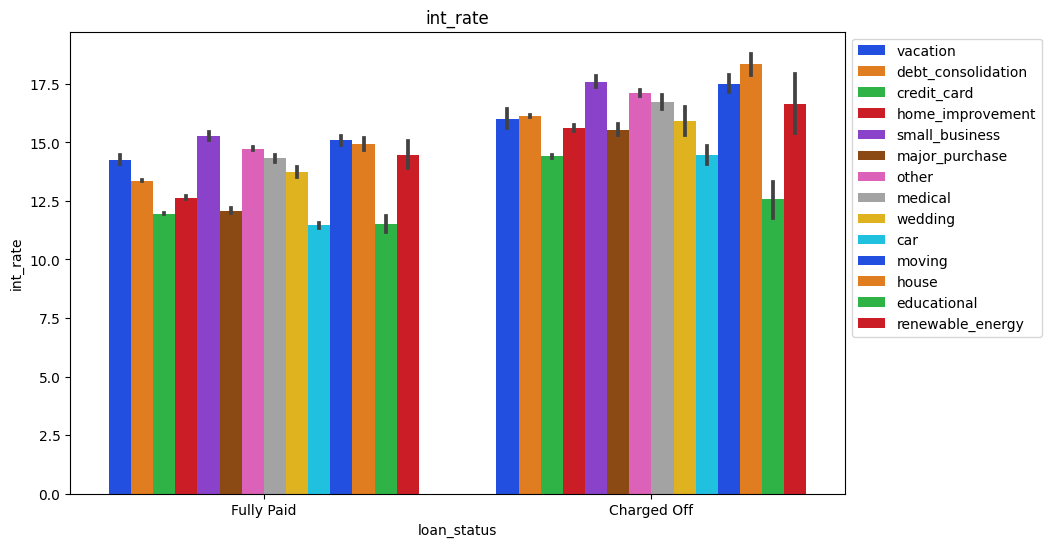

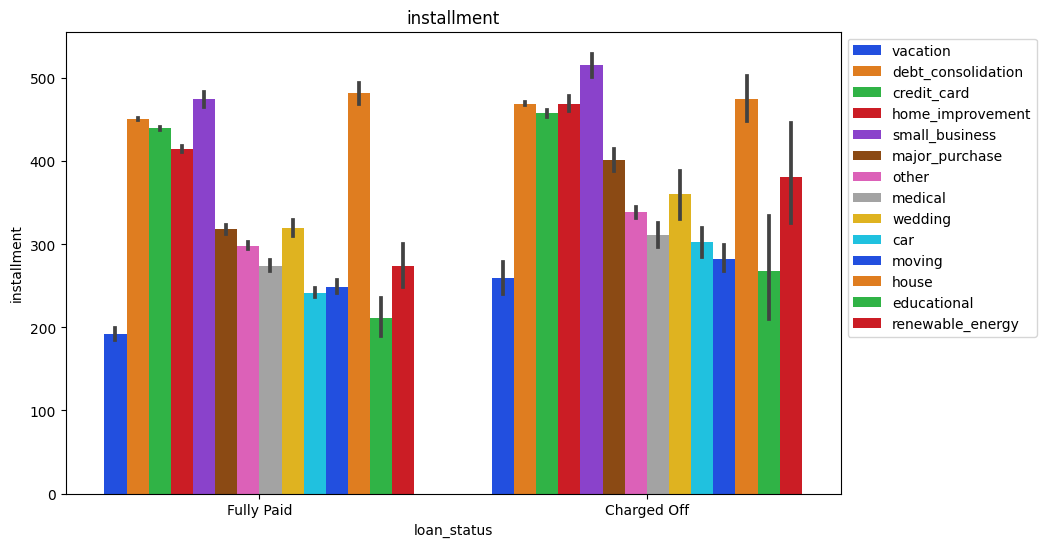

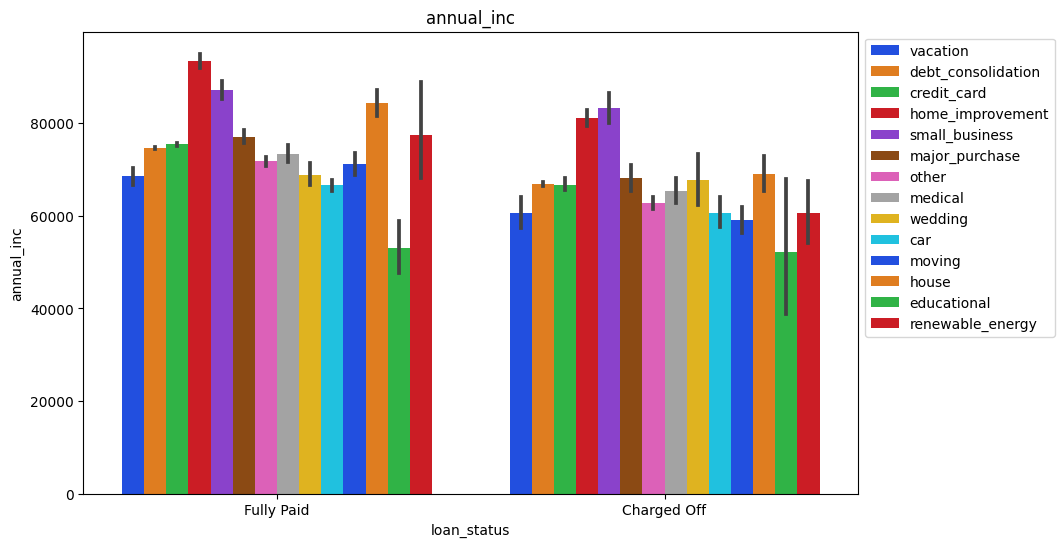

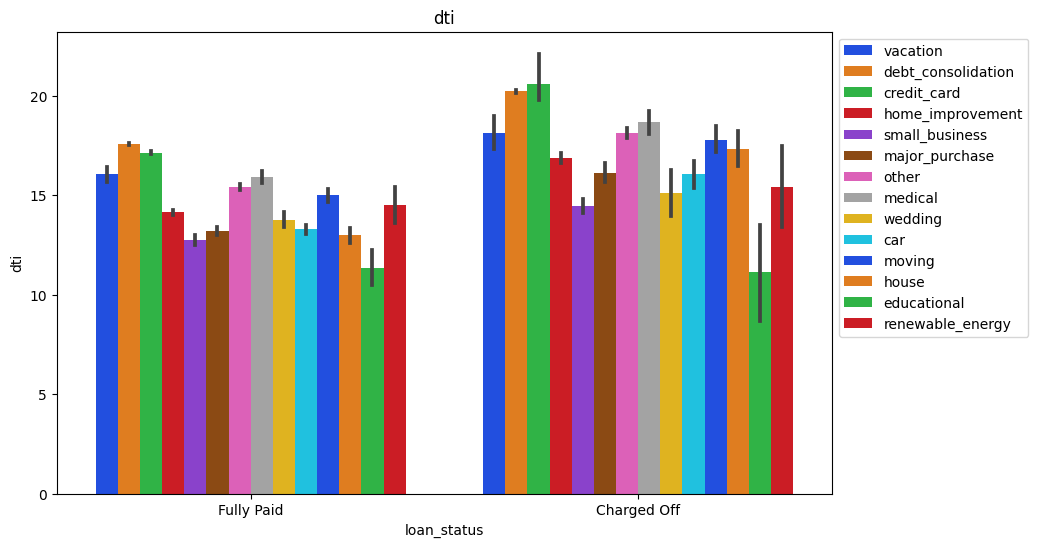

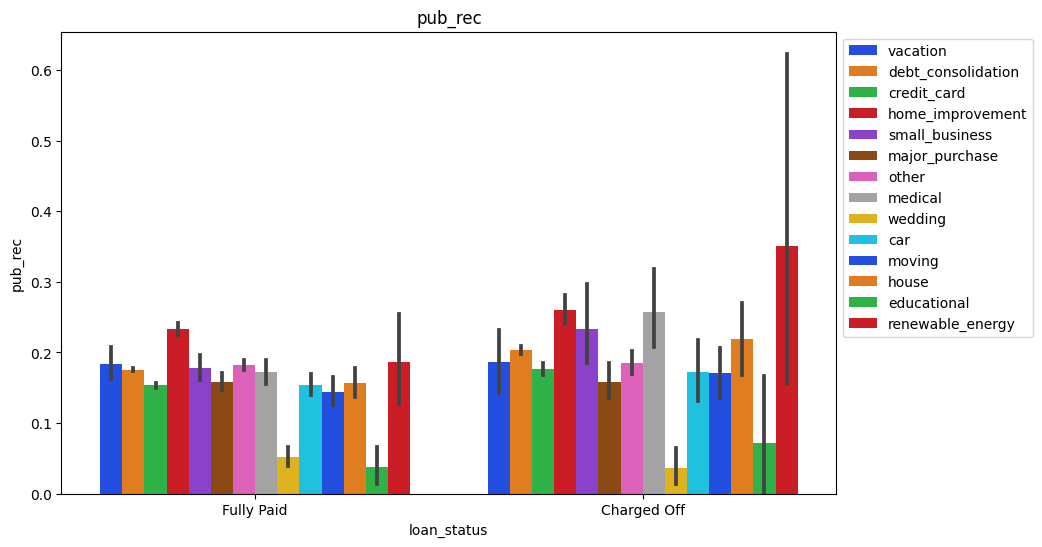

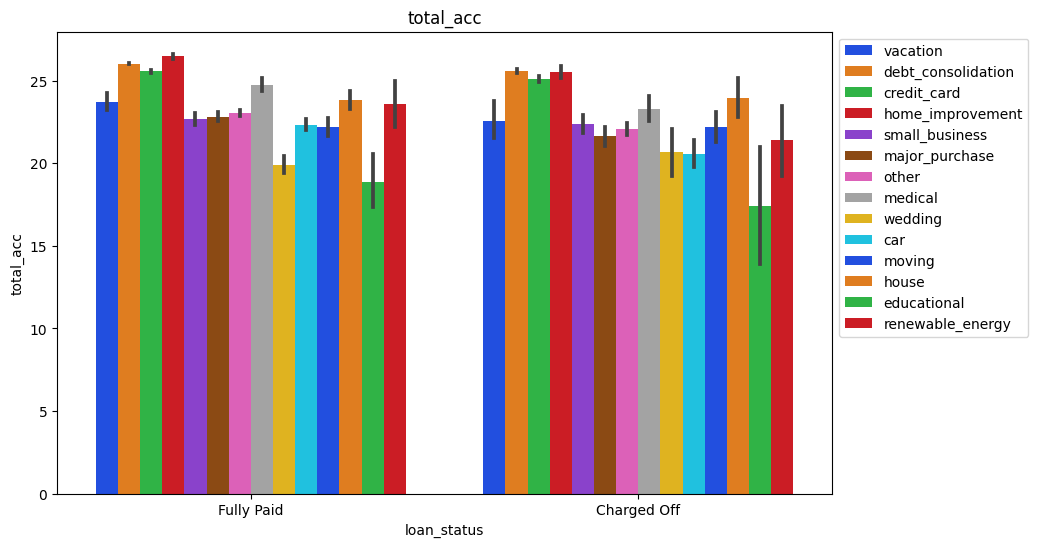

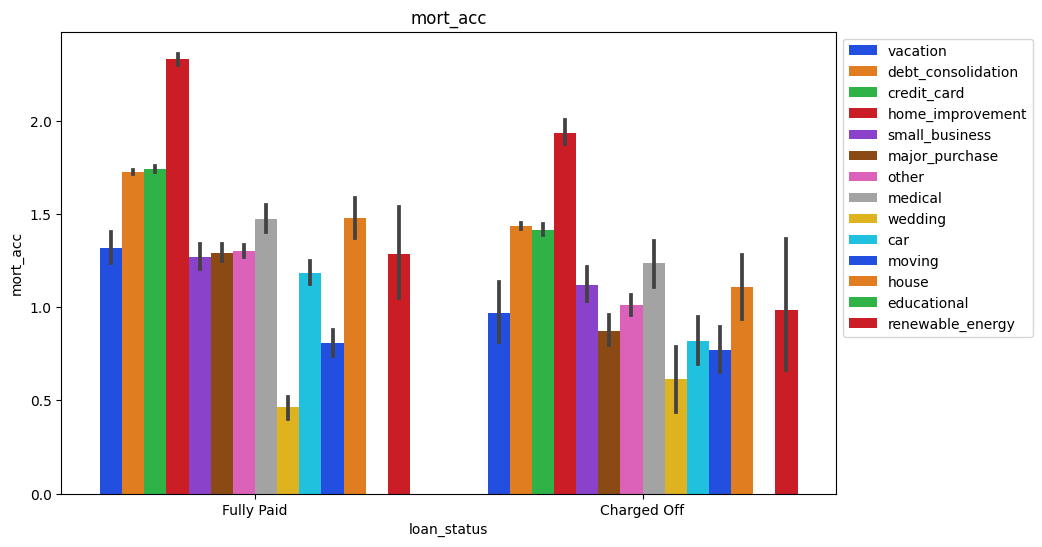

In [ ]:
columns_to_plot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'total_acc', 'mort_acc']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.set_palette('bright')
    sns.barplot(x='loan_status', data=df, y=column, hue='purpose', palette='bright')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(column)
    plt.xlabel('loan_status')
    plt.ylabel(column)
    plt.show()

#loan_amnt            : 대출 신청 금액
#int_rate             : 대출 이자율
#installment          : 월별 지불금
#grade                : 신용 등급
#annual_inc           : 연간 소득
#dti                  : 월별 부채 총액 / 월 소득
#pub_rec              : 경멸적인 공개 기록의 수
#total_acc            : 총 신용 한도 수
#mort_acc             : 모기지 계좌 수
#pub_rec_bankruptcies : 공공 기록 파산 건수

# 목적별 대출 현황으로 나눈 대출 신청 금액


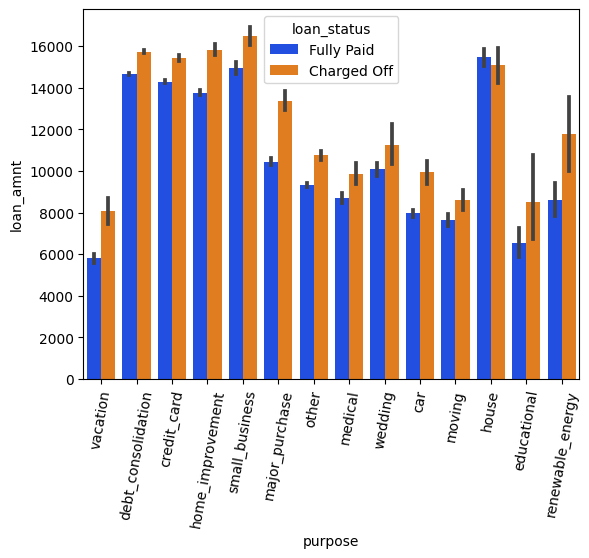

In [ ]:
sns.barplot(data=df, x="purpose",y="loan_amnt", hue='loan_status')
plt.xticks(rotation = 80)
plt.show()

# 목적에 따른 대출 현황

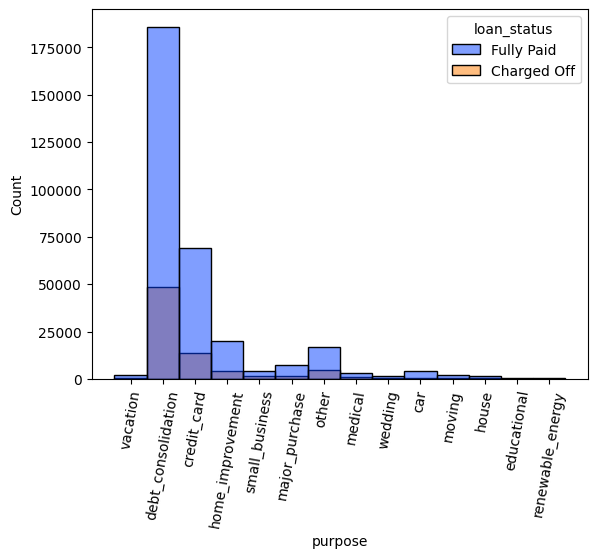

In [ ]:
sns.histplot(df, x="purpose", hue="loan_status")
plt.xticks(rotation = 80)
plt.show()


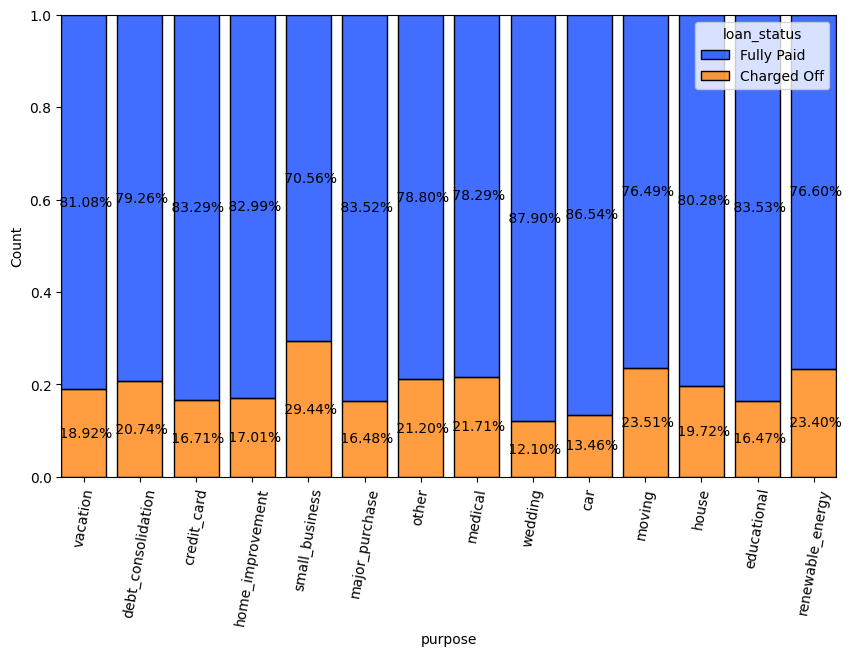

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="purpose", hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df['purpose'].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.xticks(rotation = 80)
plt.xlabel('purpose')
plt.ylabel('Count')

plt.show()

## 상환기간이 길면 charged off 비율이 높다.

<Axes: xlabel='term', ylabel='Count'>

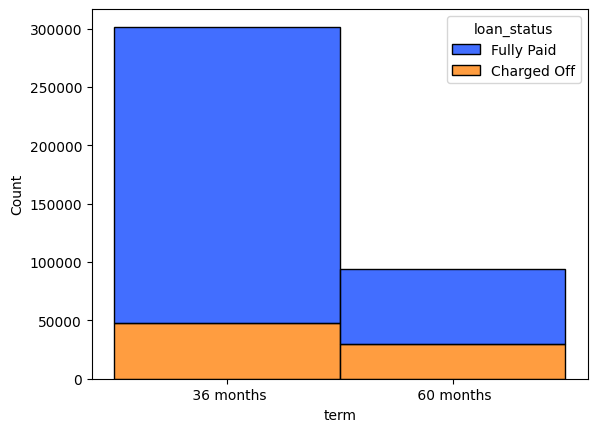

In [ ]:
sns.histplot(df, x="term", hue="loan_status", multiple='stack')

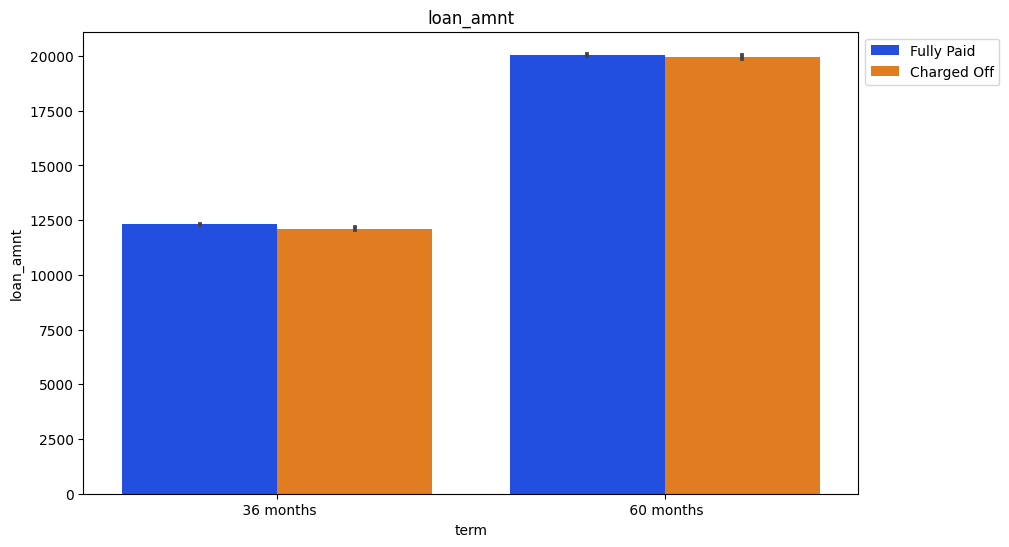

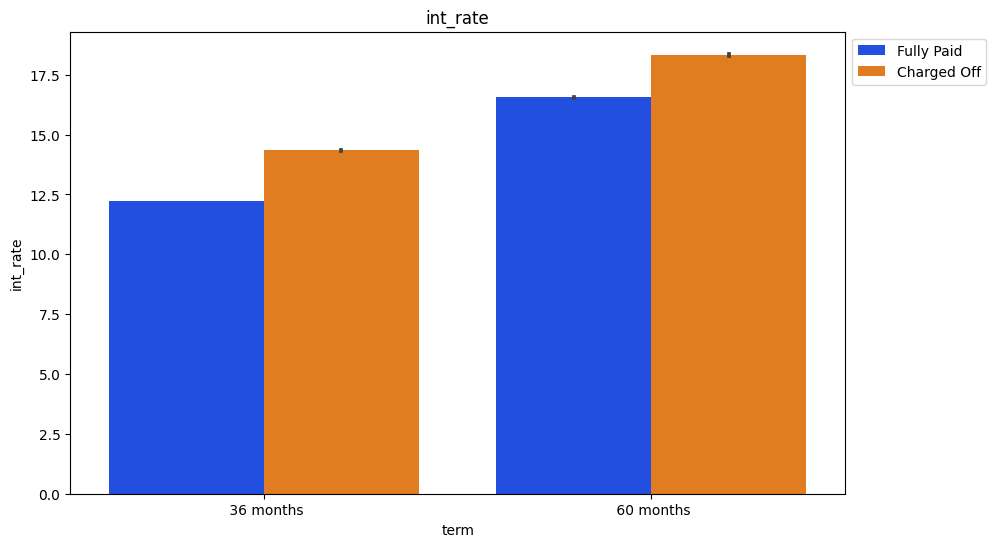

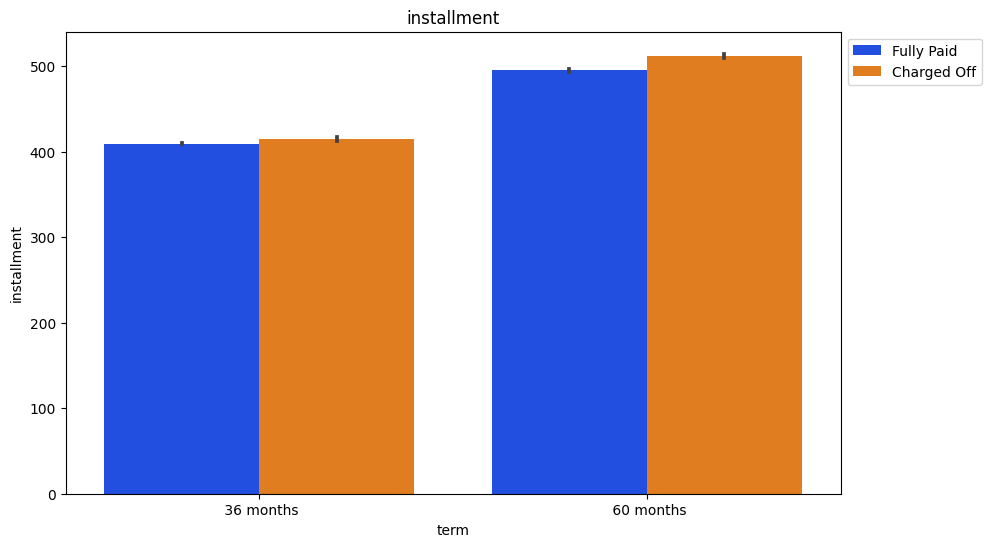

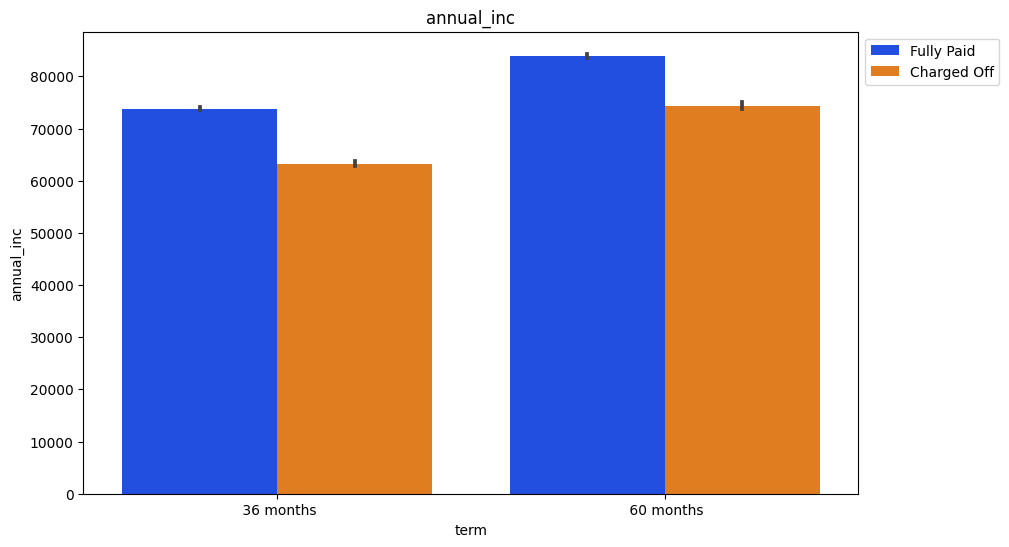

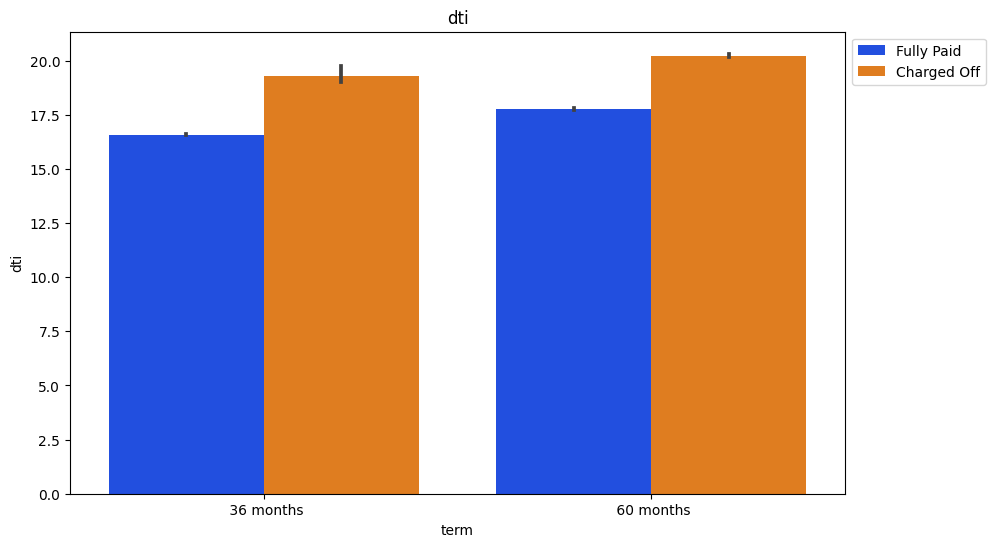

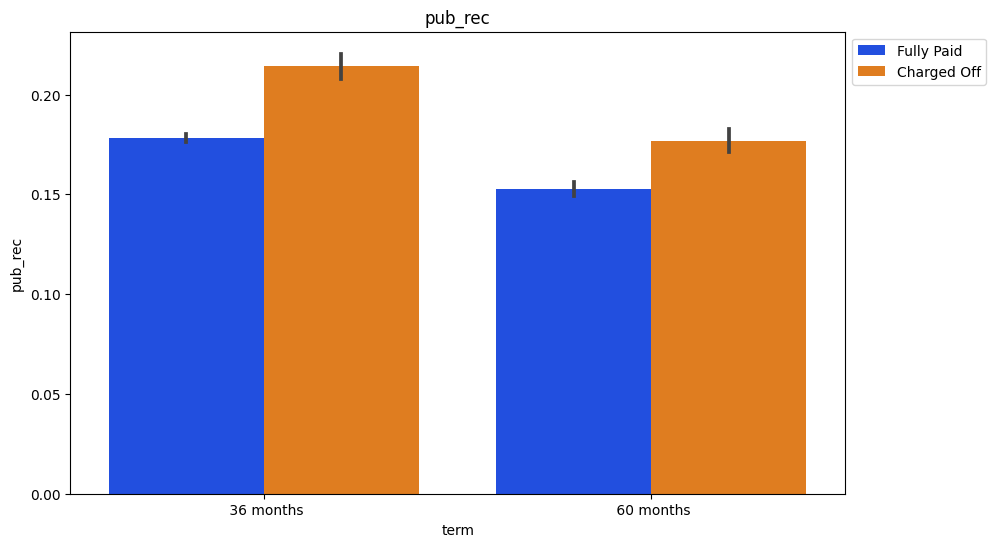

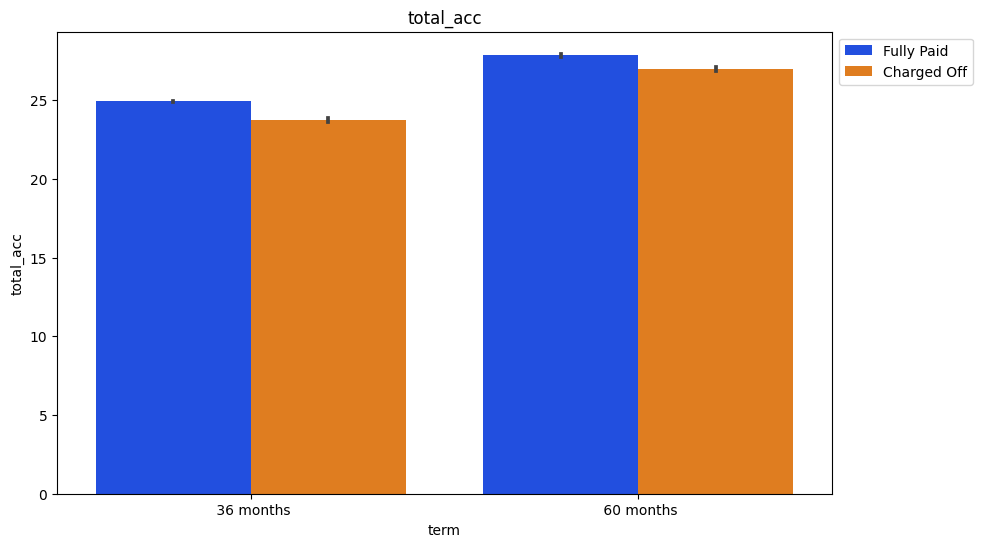

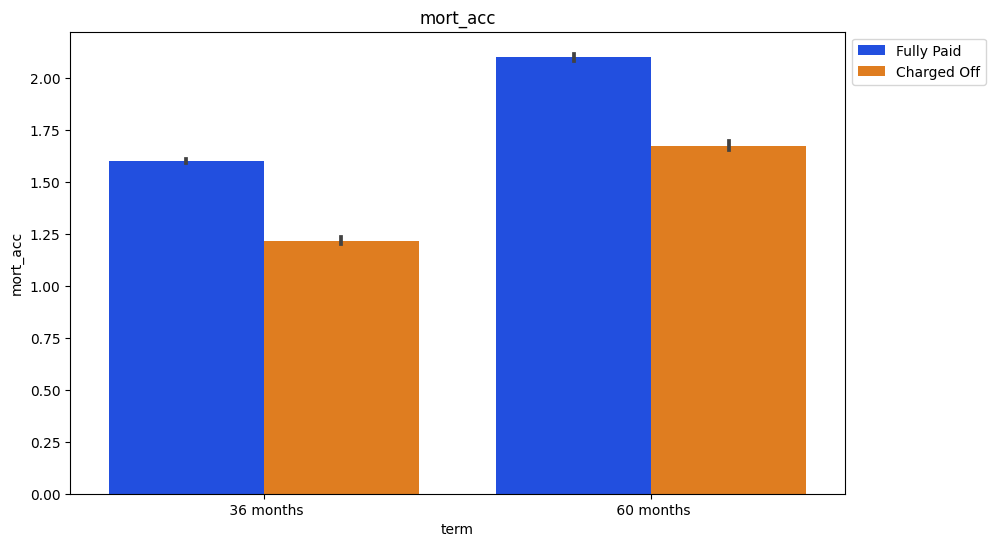

In [ ]:
columns_to_plot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'total_acc', 'mort_acc']
a = df.sort_values(by='loan_status')

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.set_palette('bright')
    sns.barplot(x='term', data=df, y=column, hue='loan_status')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(column)
    plt.xlabel('term')
    plt.ylabel(column)
    plt.show()

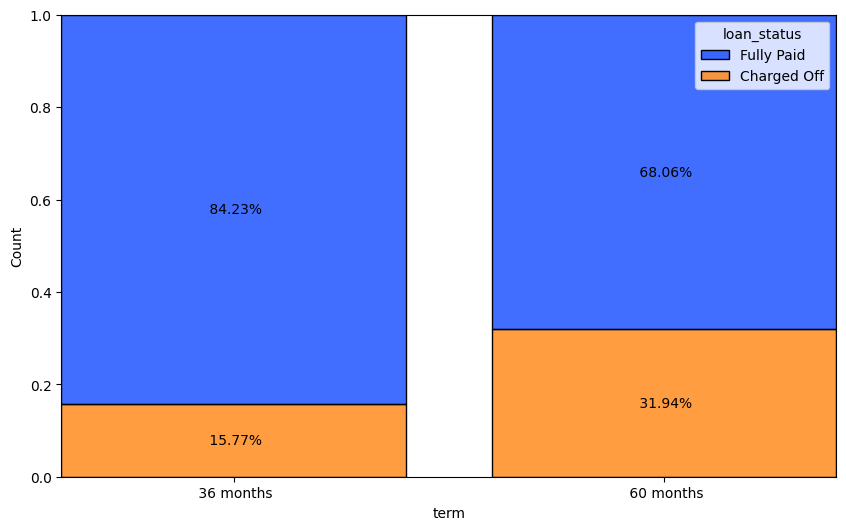

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="term", hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df['term'].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.xlabel('term')
plt.ylabel('Count')

plt.show()

# sub_grade

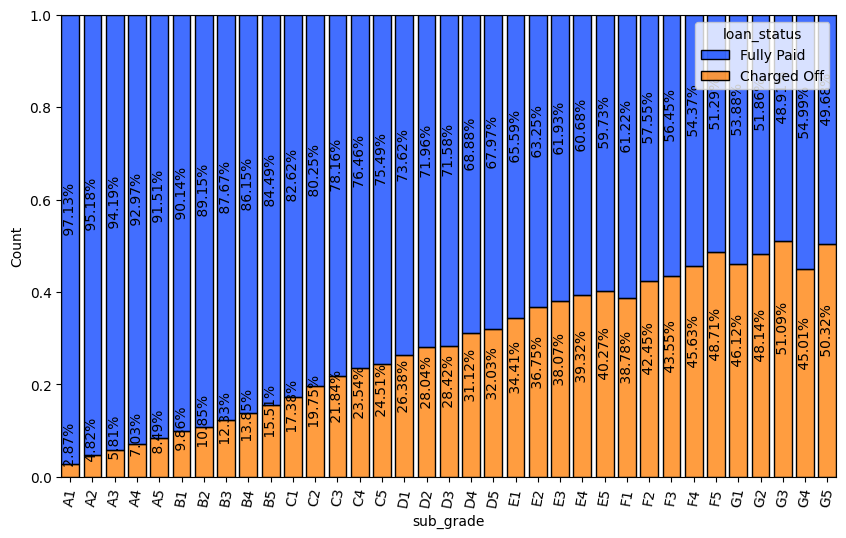

In [ ]:
unique_grades = sorted(df['sub_grade'].unique())
df['sub_grade'] = pd.Categorical(df['sub_grade'], categories=unique_grades, ordered=True)


plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="sub_grade", hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df['sub_grade'].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='bottom', rotation=90)
plt.xticks(rotation = 80)
plt.xlabel('sub_grade')
plt.ylabel('Count')

plt.show()

# emp_length 칼럼 순서 변환

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'emp_category'],
      dtype='object')

In [ ]:
desired_order = ['0', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df['emp_length'] = pd.Categorical(df['emp_length'], categories=desired_order, ordered=True)

x = df['emp_category'].value_counts()[:20].index
df_top_20_emp_category = df[df['emp_category'].isin(x)]

In [ ]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
395749      2 years
395750      5 years
395751    10+ years
395752    10+ years
395753    10+ years
Name: emp_length, Length: 395754, dtype: category
Categories (12, object): ['0' < '< 1 year' < '1 year' < '2 years' ... '7 years' < '8 years' <
                          '9 years' < '10+ years']

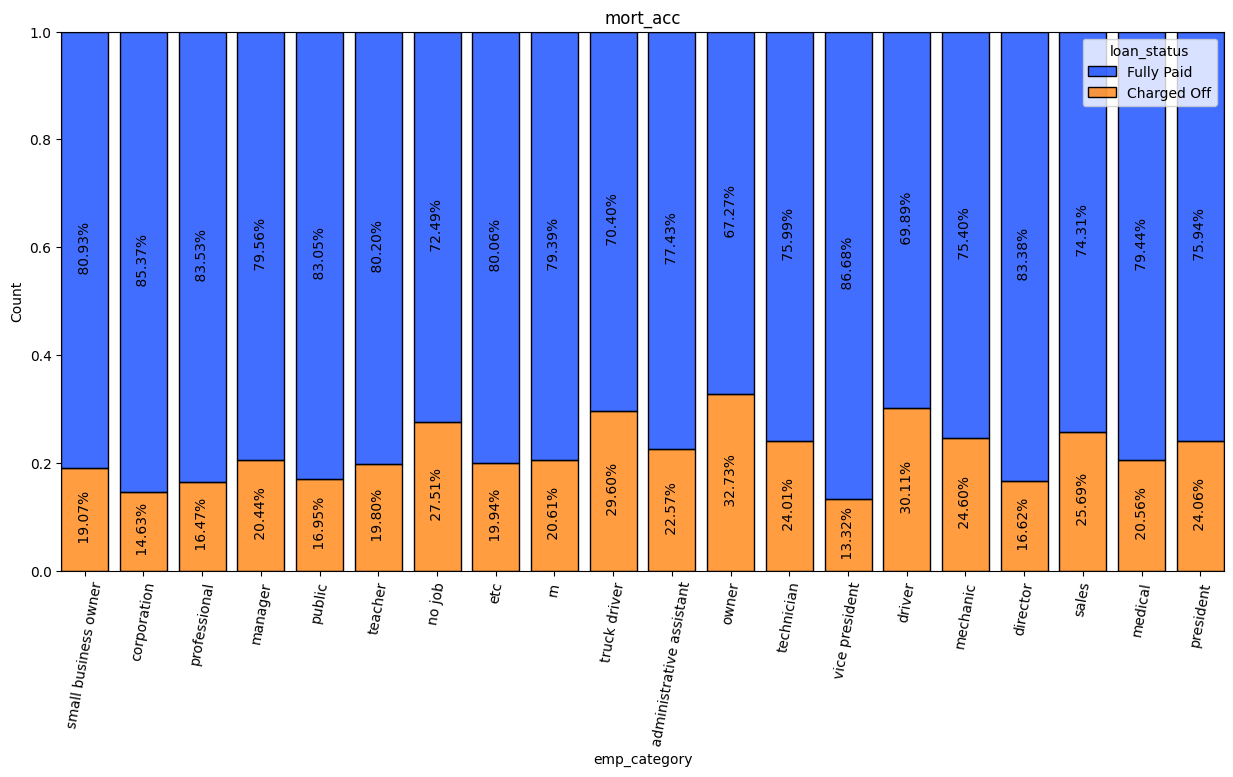

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(data=df_top_20_emp_category, x='emp_category', hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df[col].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90)
plt.title(col)
plt.xticks(rotation = 80)
plt.ylabel('Count')

plt.show()

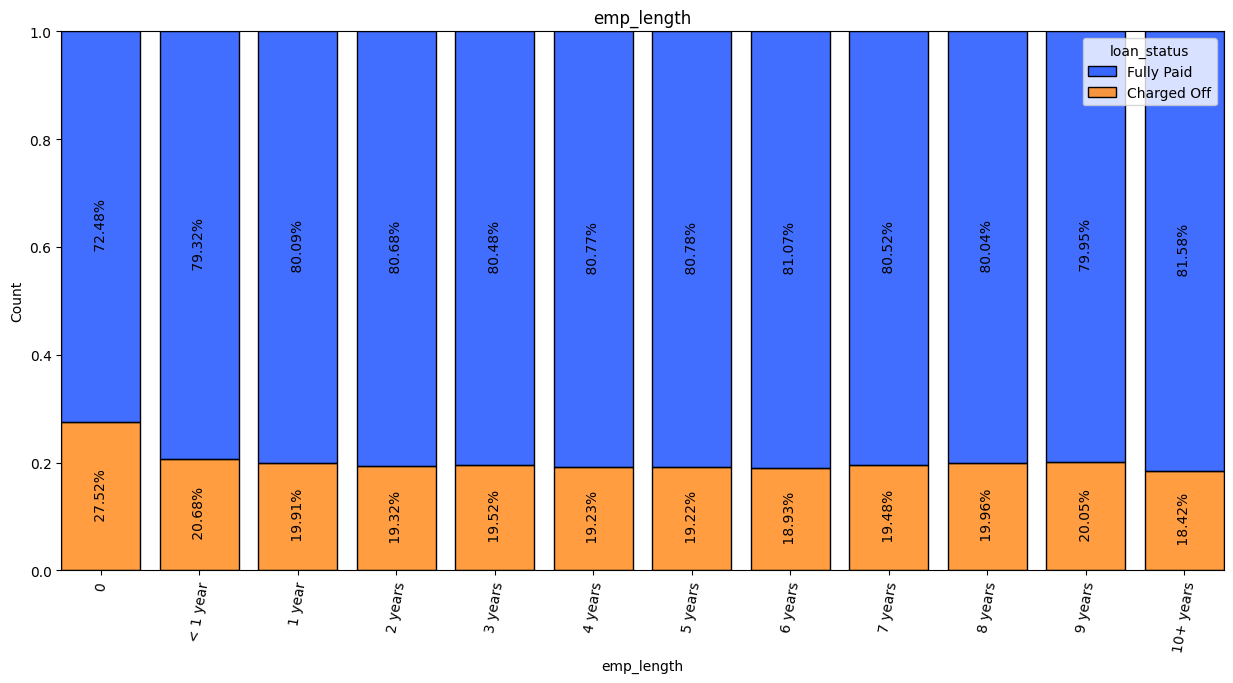

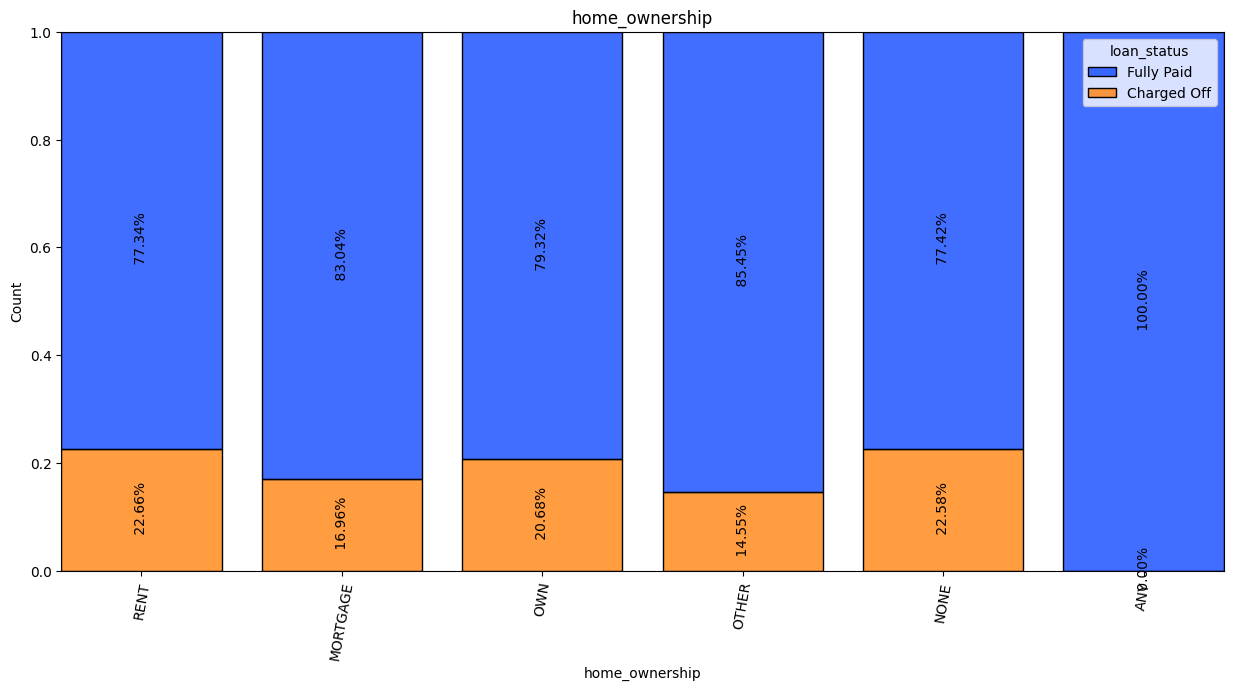

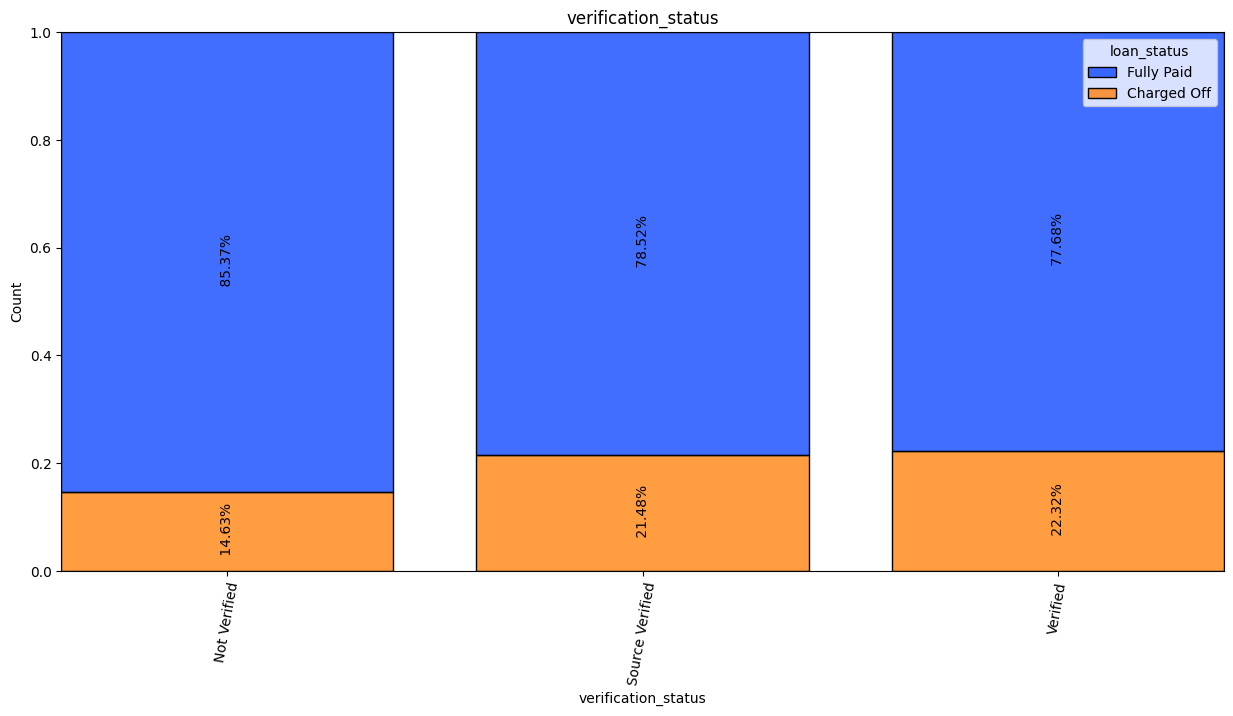

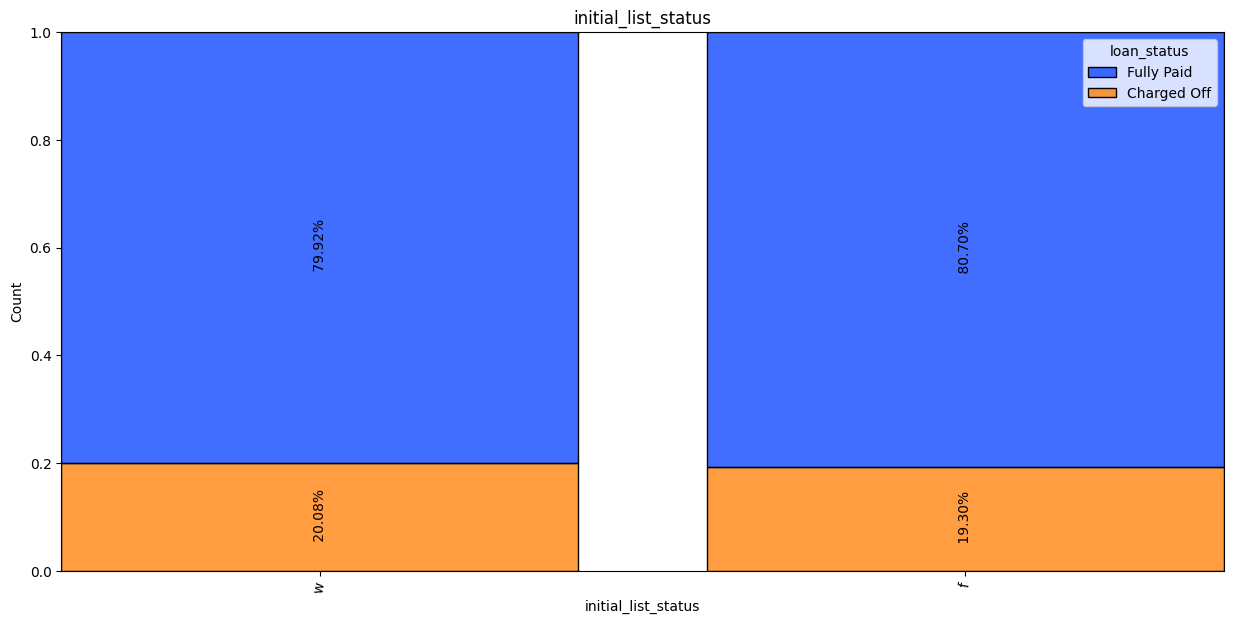

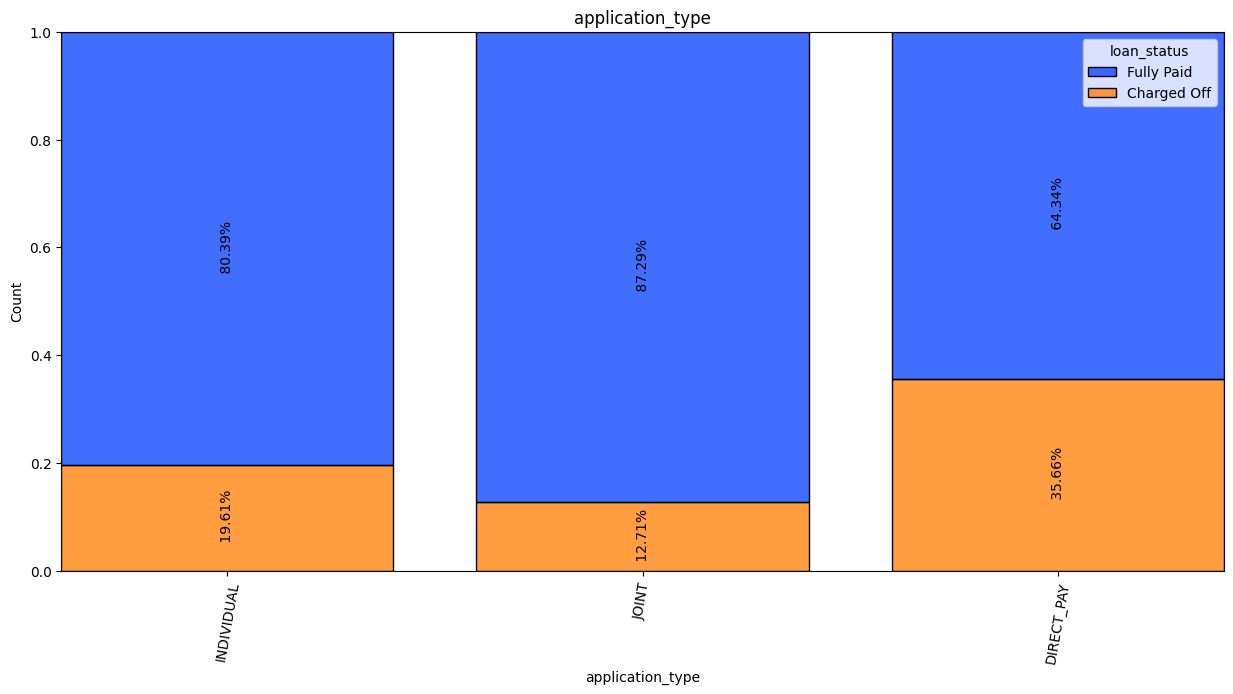

In [ ]:
ob_col = ['emp_length', 'home_ownership', 'verification_status','initial_list_status', 'application_type']

for col in ob_col:
  plt.figure(figsize=(15, 7))
  ax = sns.histplot(data=df, x=col, hue="loan_status", multiple="fill", shrink=0.8)

  total_counts = df[col].value_counts()

  for p in ax.patches:
      left, bottom, width, height = p.get_bbox().bounds
      ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90)
  plt.title(col)
  plt.xticks(rotation = 80)
  plt.ylabel('Count')

plt.show()


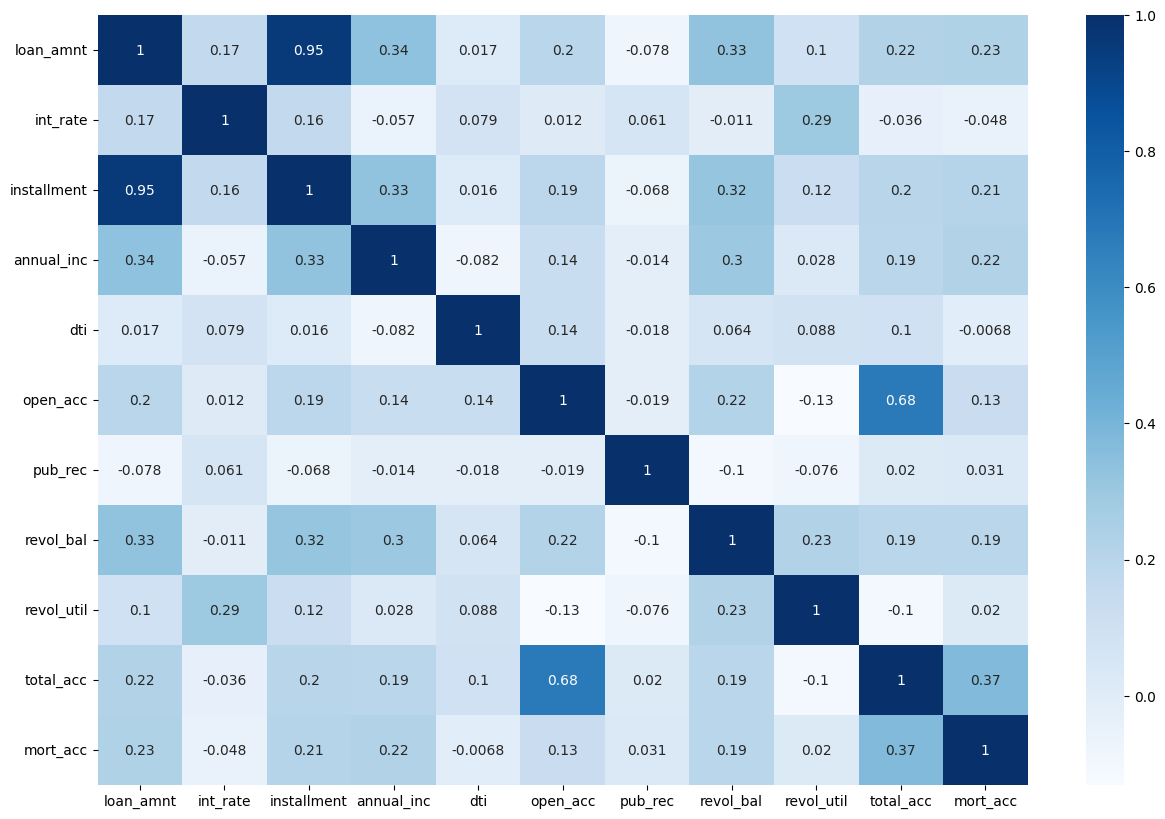

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

# 못갚는 사람들중 목적이 debt_consolidation, credit_card 인것...

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

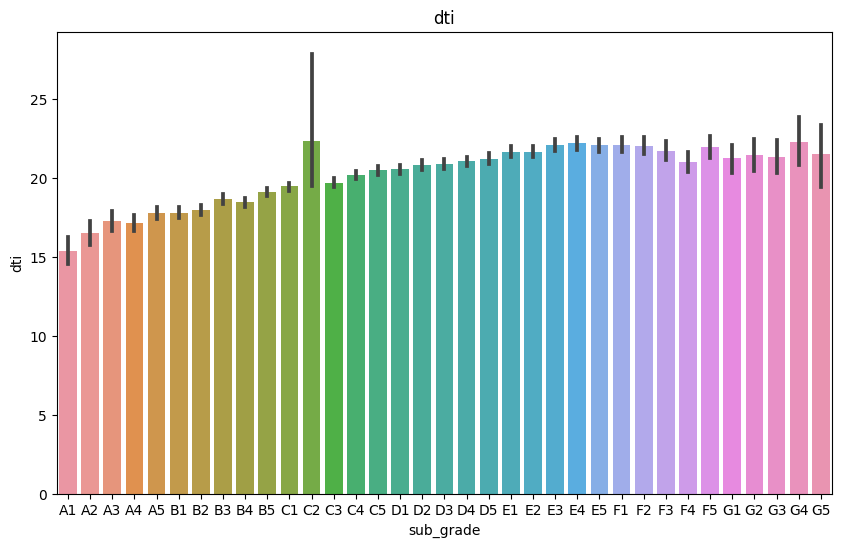

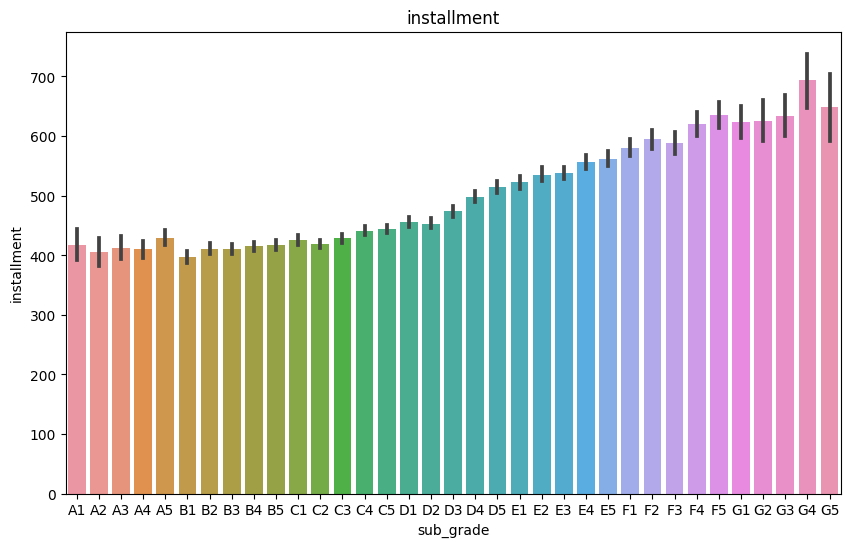

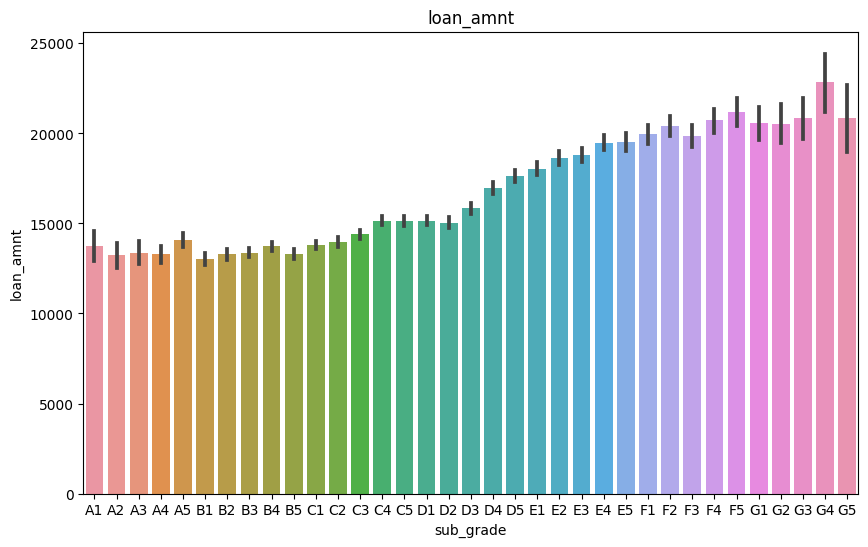

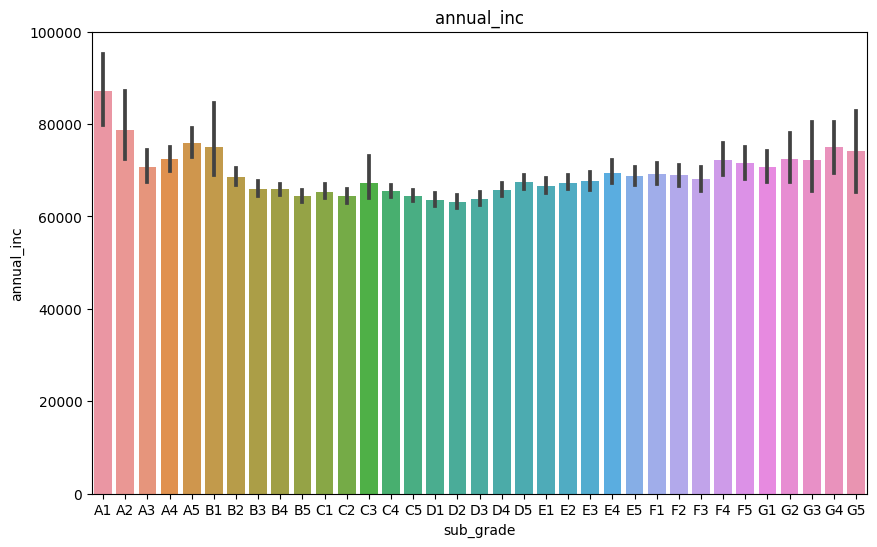

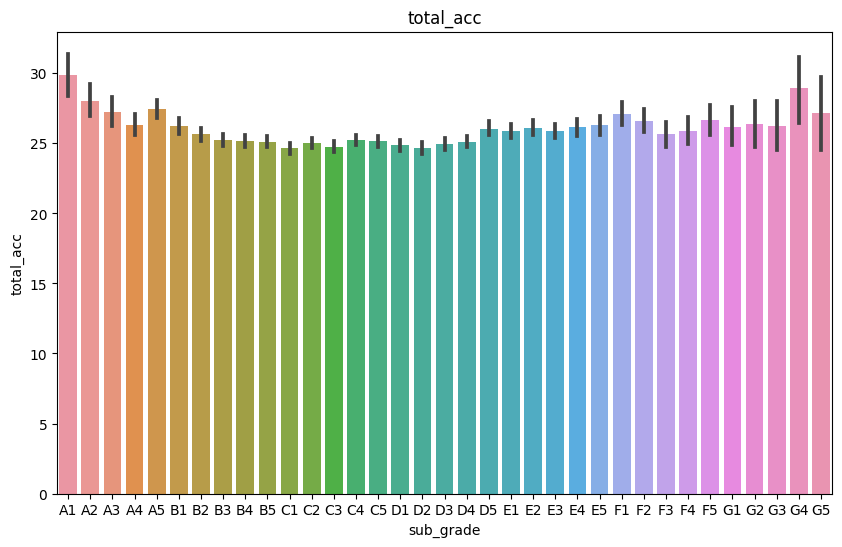

In [ ]:
Charged_Off_df = df[df['loan_status'] == 'Charged Off']
Charged_Off_temp_df = Charged_Off_df[(Charged_Off_df['purpose'] == 'debt_consolidation') | (Charged_Off_df['purpose'] == 'credit_card')]

columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc', 'total_acc']

unique_grades = sorted(Charged_Off_temp_df['sub_grade'].unique())

Charged_Off_temp_df['sub_grade'] = pd.Categorical(Charged_Off_temp_df['sub_grade'], categories=unique_grades, ordered=True)

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=Charged_Off_temp_df['sub_grade'], y=Charged_Off_temp_df[column])
    plt.title(column)
    plt.xlabel('sub_grade')
    plt.ylabel(column)
    plt.show()



# dti         : 월별 부채 총액 / 월 소득
# installment : 월별 지불금
# loan_amnt   : 신청 대출 금액
# loan_status : 대출 현황   높을수록 상환X
# annual_inc  : 연간 소득

# 'home_ownership' 컬럼에서  'OWN' 제외 테이블 생성


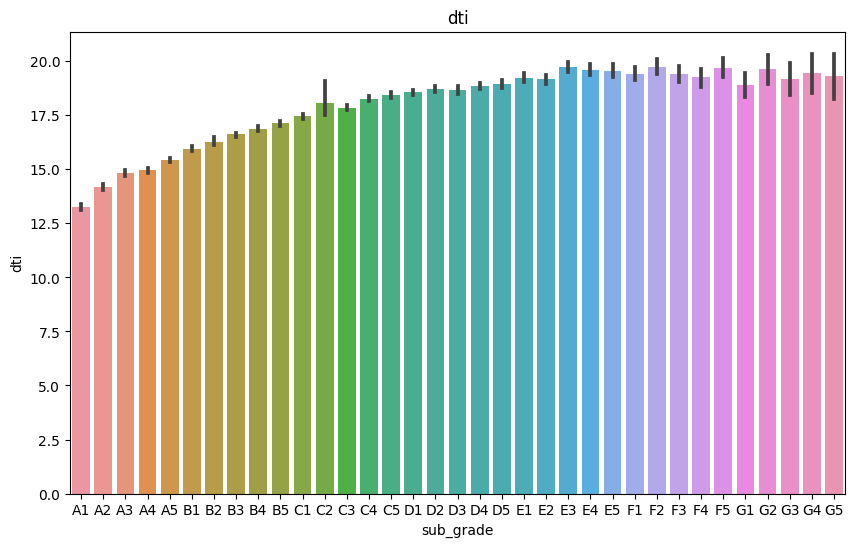

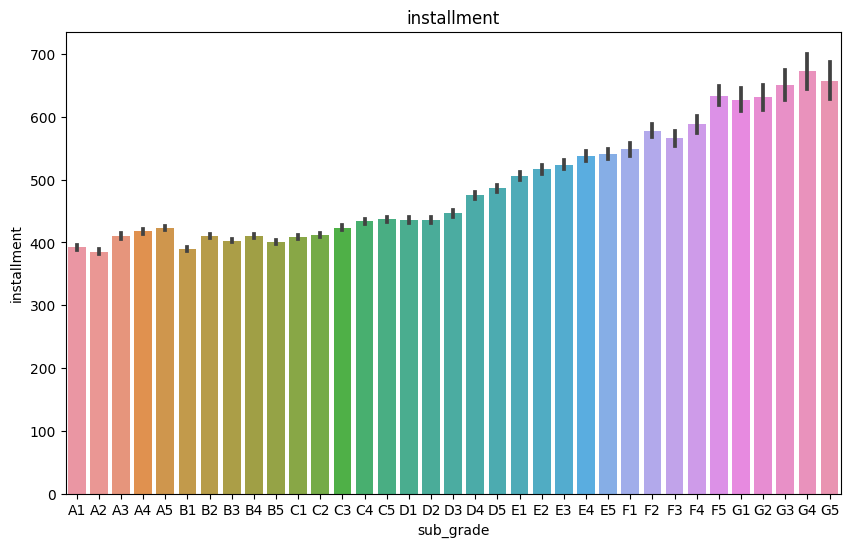

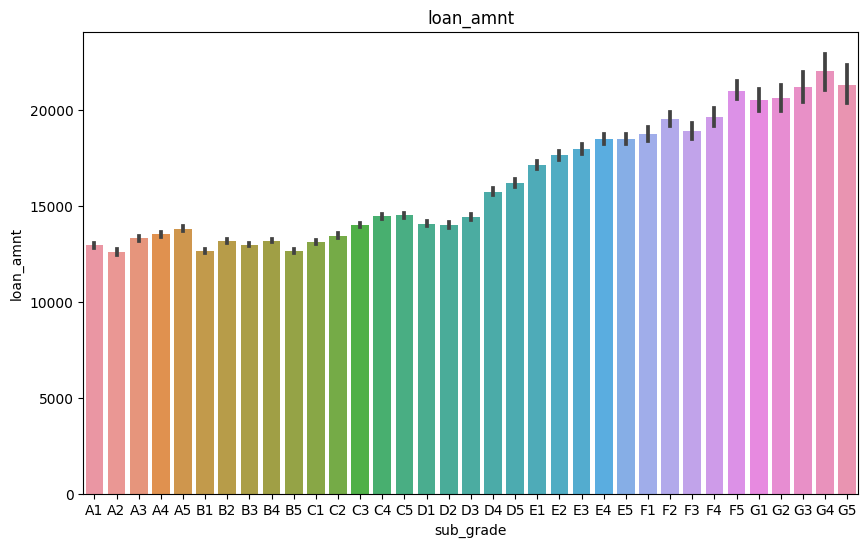

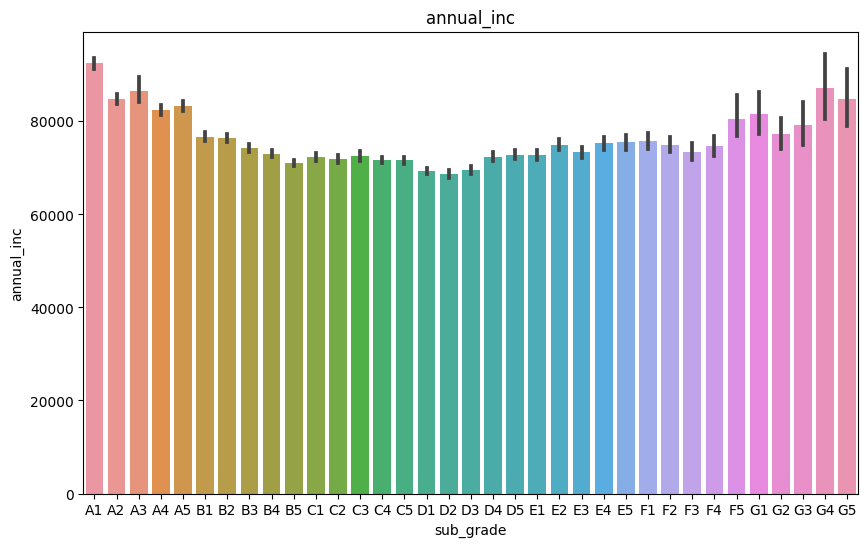

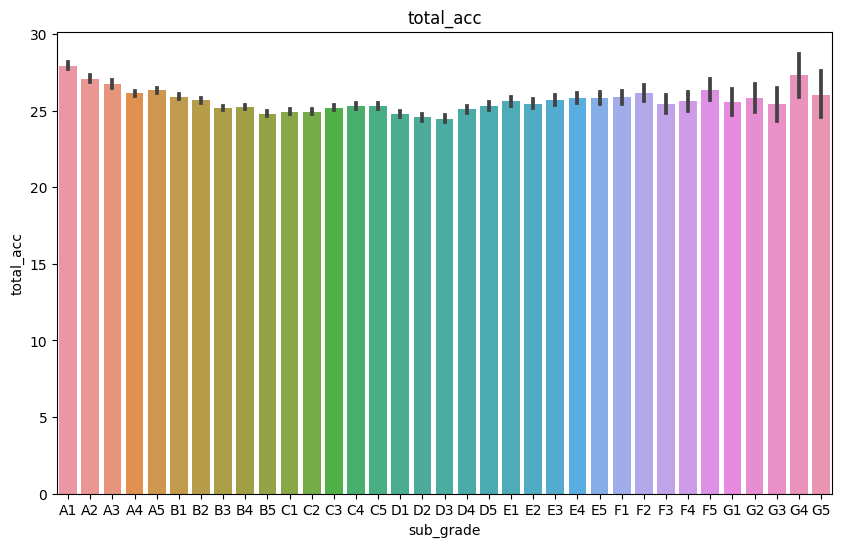

In [ ]:
temp_df = df[df['home_ownership'] != 'OWN']

columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc', 'total_acc']

unique_grades = sorted(df['sub_grade'].unique())

temp_df['sub_grade'] = pd.Categorical(temp_df['sub_grade'], categories=unique_grades, ordered=True)

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=temp_df['sub_grade'], y=temp_df[column])
    plt.title(column)
    plt.xlabel('sub_grade')
    plt.ylabel(column)
    plt.show()

# dti         : 월별 부채 총액 / 월 소득
# installment : 월별 지불금
# loan_amnt   : 신청 대출 금액
# loan_status : 대출 현황   높을수록 상환X
# annual_inc  : 연간 소득

# home_ownership 별



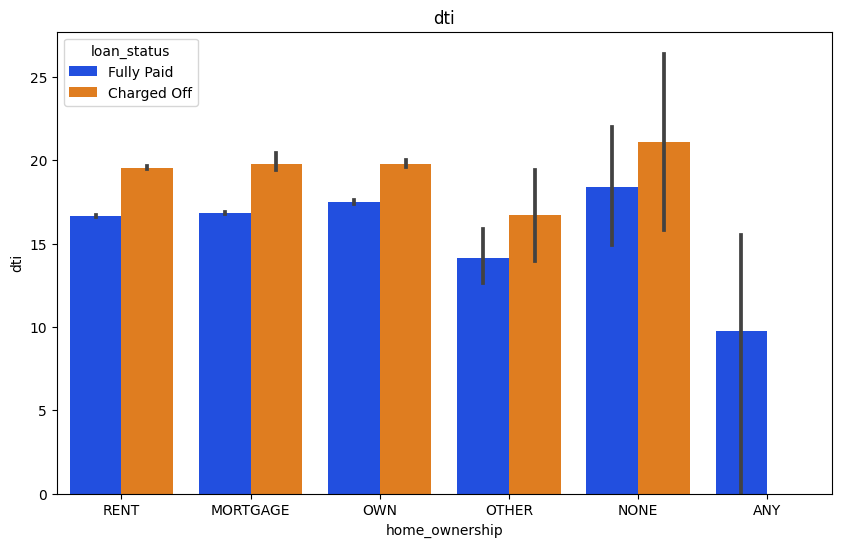

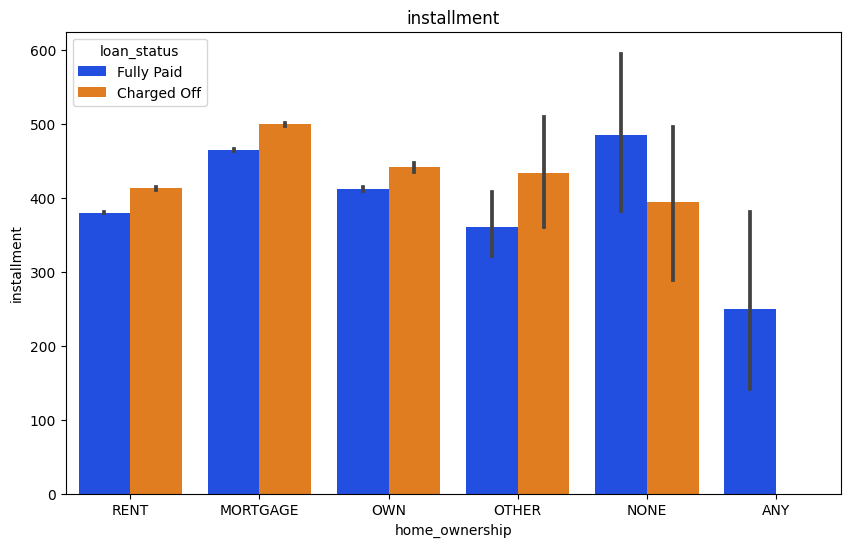

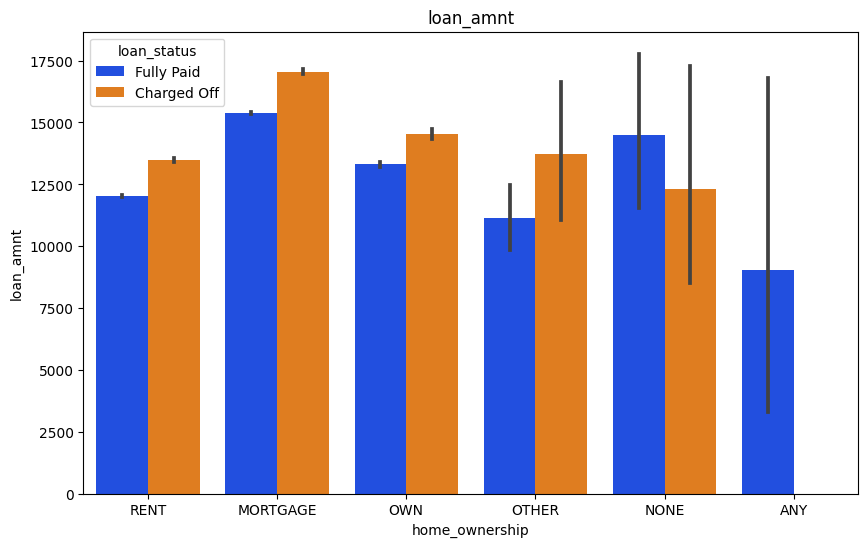

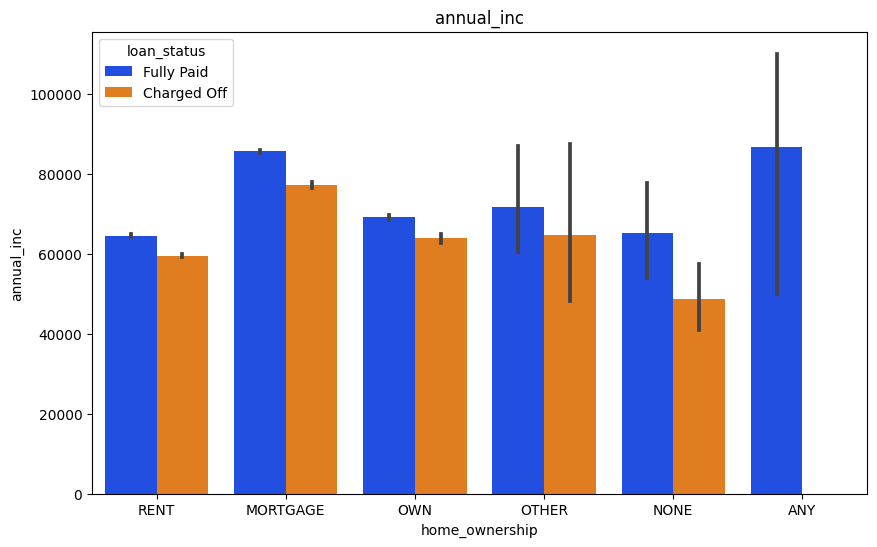

In [ ]:
columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df['home_ownership'], y=df[column], hue=df['loan_status'])
    plt.title(column)
    plt.xlabel('home_ownership')
    plt.ylabel(column)
    plt.show()

# dti         : 월별 부채 총액 / 월 소득
# installment : 월별 지불금
# loan_amnt   : 신청 대출 금액
# loan_status : 대출 현황   높을수록 상환X
# annual_inc  : 연간 소득


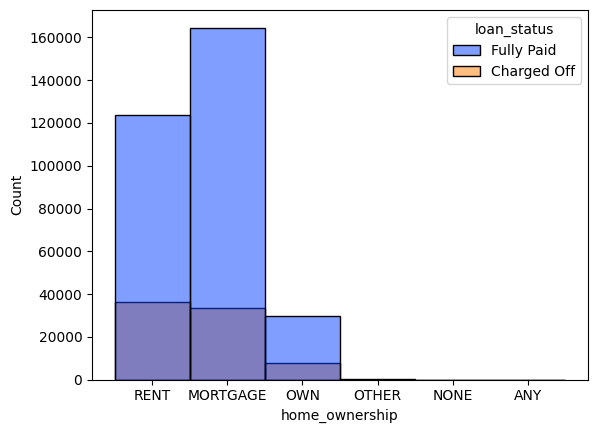

In [ ]:
sns.histplot(x=df['home_ownership'], hue=df['loan_status'])
plt.show()

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'emp_category'],
      dtype='object')

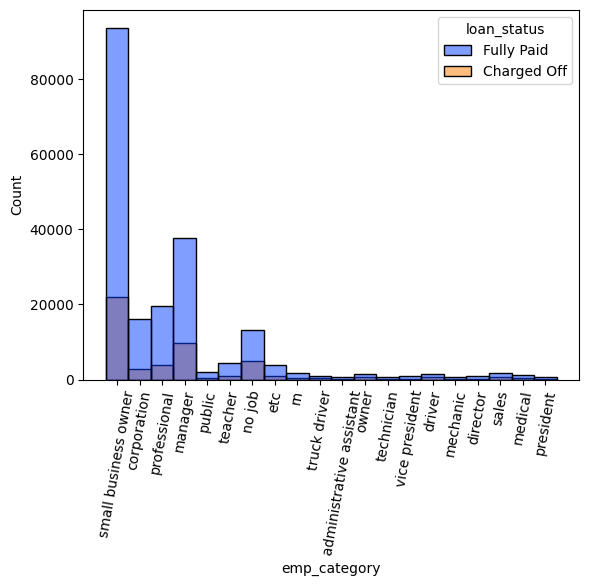

In [ ]:
x = df['emp_category'].value_counts()[:20].index
df_top_20_emp_title = df[df['emp_category'].isin(x)]

sns.histplot(data=df_top_20_emp_title, x='emp_category', hue='loan_status')
plt.xticks(rotation=80)
plt.show()

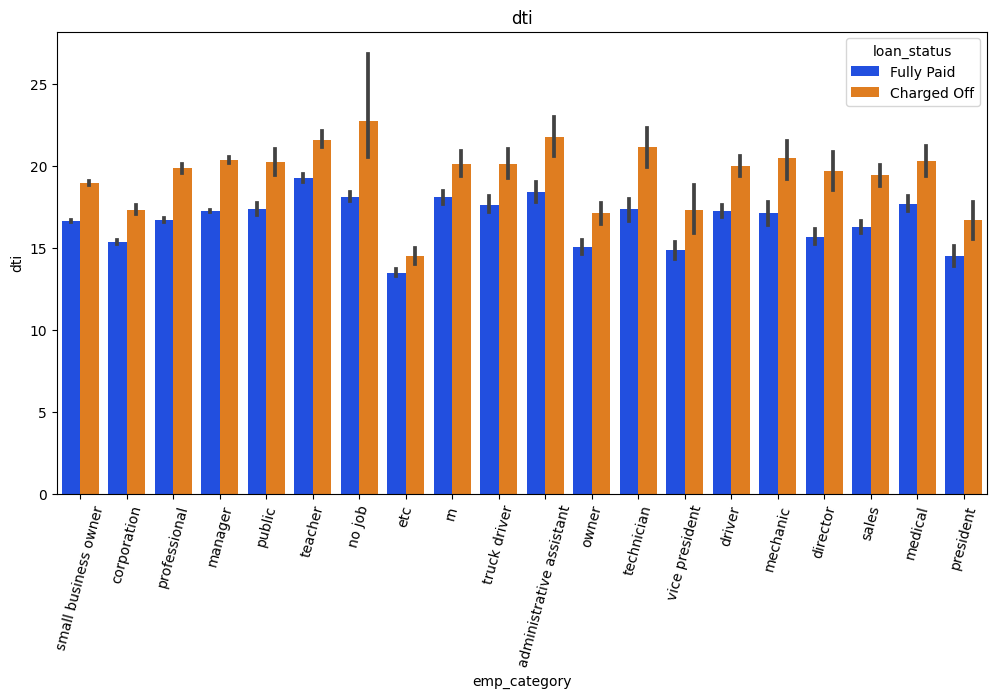

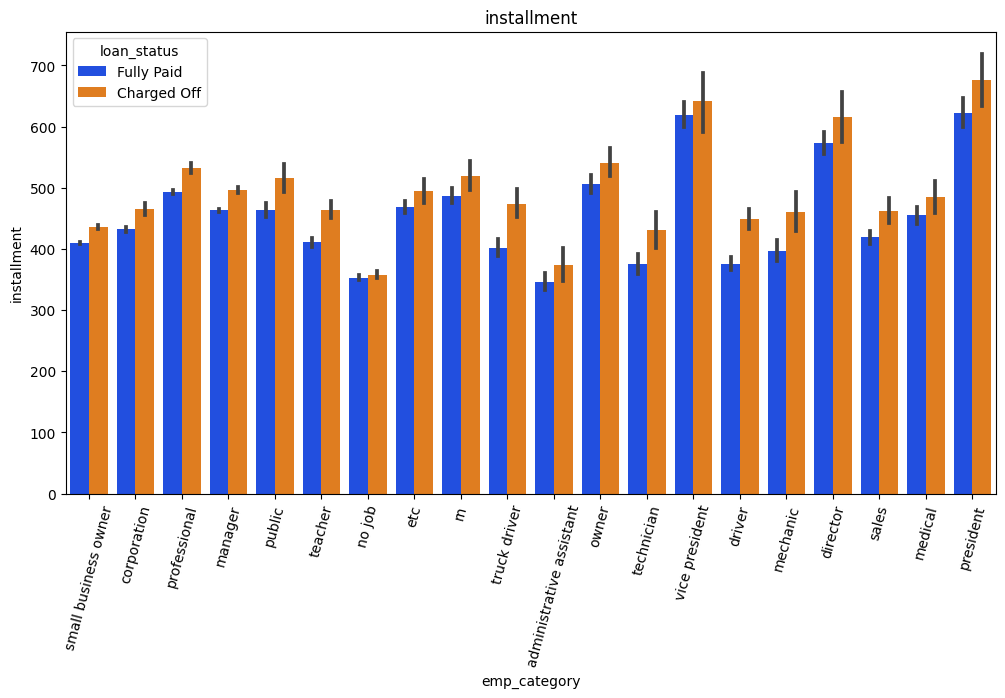

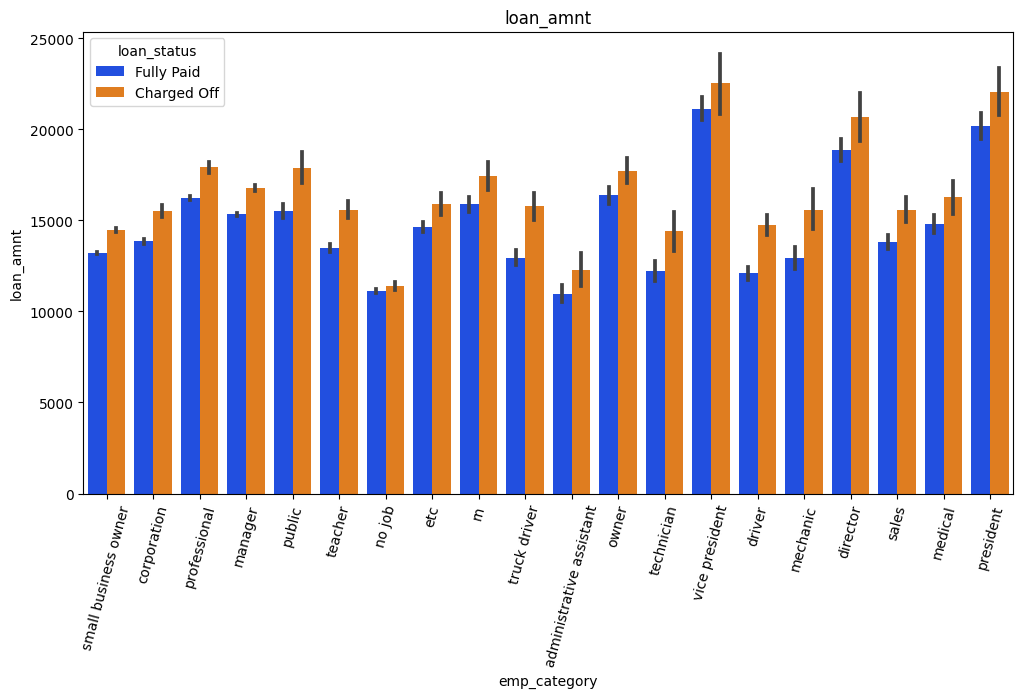

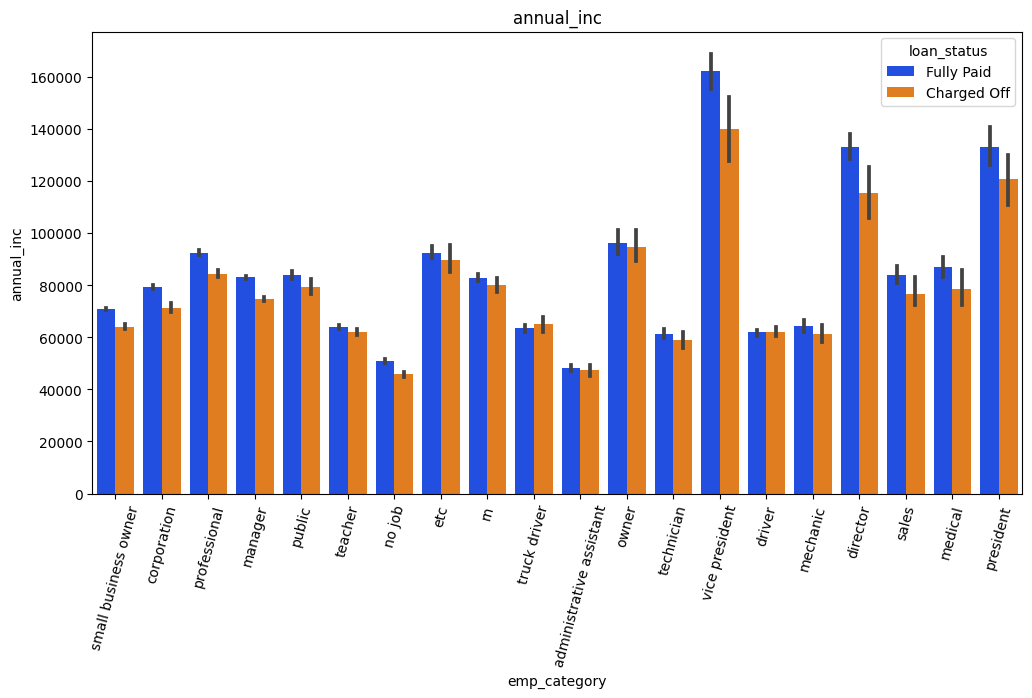

In [ ]:
x = df['emp_category'].value_counts()[:20].index
df_top_20_emp_title = df[df['emp_category'].isin(x)]

columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='emp_category', y=column, hue='loan_status', data=df_top_20_emp_title)
    plt.title(column)
    plt.xlabel('emp_category')
    plt.xticks(rotation=75)
    plt.ylabel(column)
    plt.show()


In [ ]:
df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership')['term'].value_counts(10)

home_ownership  term      
ANY              36 months    0.666667
                 60 months    0.333333
MORTGAGE         36 months    0.757898
                 60 months    0.242102
NONE             36 months    0.875000
                 60 months    0.125000
OTHER            36 months    0.989362
                 60 months    0.010638
OWN              36 months    0.810168
                 60 months    0.189832
RENT             36 months    0.850849
                 60 months    0.149151
Name: term, dtype: float64

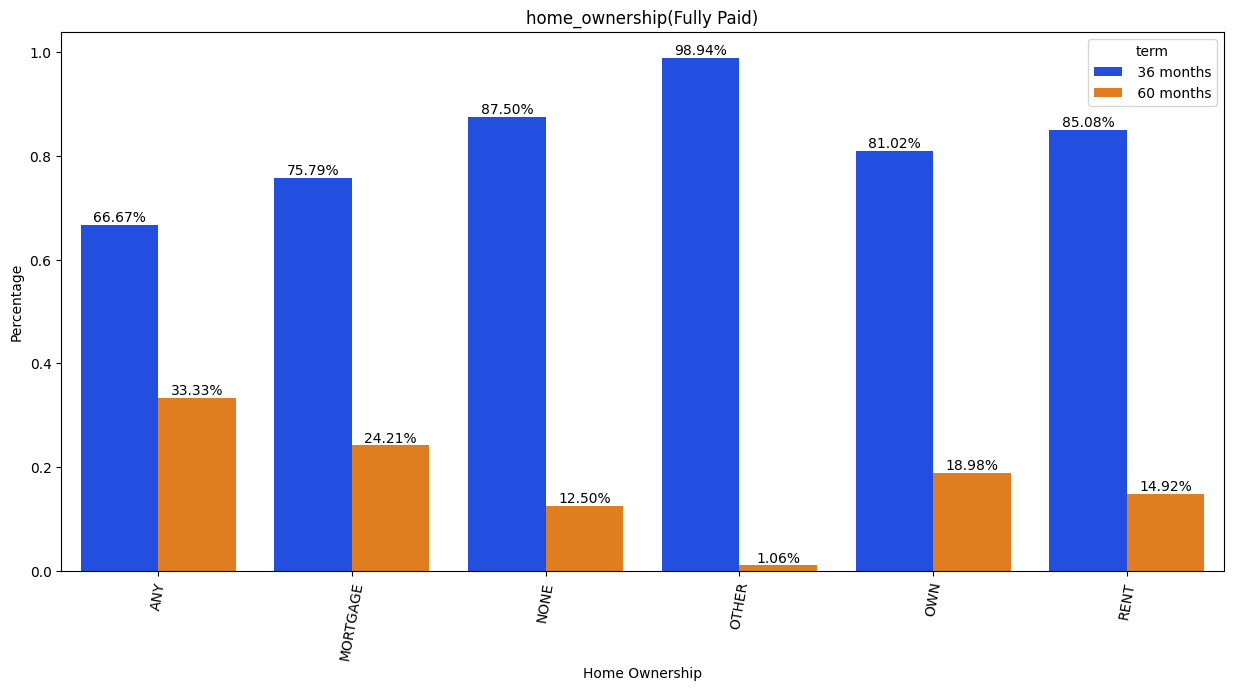

In [ ]:
df_top_10_fp = df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership')['term'].value_counts(normalize=True).reset_index(name='percentage')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_top_10_fp, x='home_ownership', y='percentage', hue='term')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('home_ownership(Fully Paid)')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=80)
plt.show()

In [ ]:
df[df['loan_status'] == 'Charged Off'].groupby('home_ownership')['term'].value_counts(10)

home_ownership  term      
MORTGAGE         36 months    0.541787
                 60 months    0.458213
NONE             36 months    0.857143
                 60 months    0.142857
OTHER            36 months    0.875000
                 60 months    0.125000
OWN              36 months    0.647217
                 60 months    0.352783
RENT             36 months    0.672149
                 60 months    0.327851
Name: term, dtype: float64

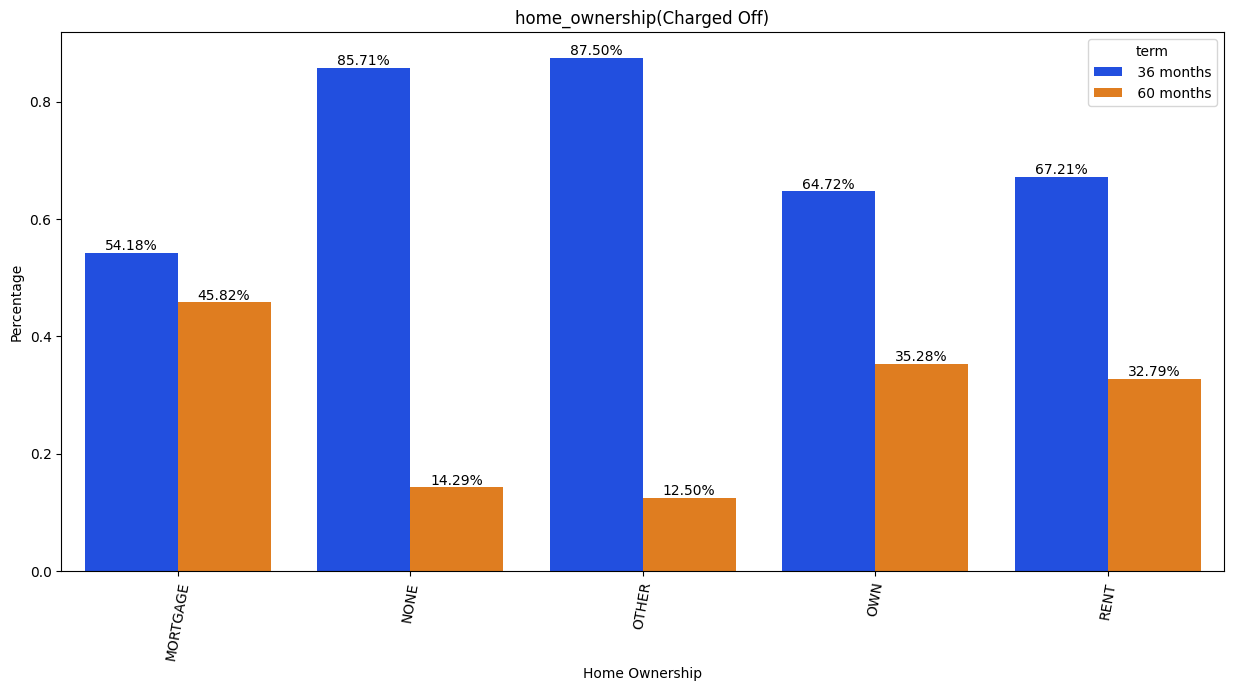

In [ ]:
df_top_10_fp = df[df['loan_status'] == 'Charged Off'].groupby('home_ownership')['term'].value_counts(normalize=True).reset_index(name='percentage')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_top_10_fp, x='home_ownership', y='percentage', hue='term')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('home_ownership(Charged Off)')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=80)
plt.show()